# Import Dataset

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
init_notebook_mode(connected=True)

cf.go_offline()

In [2]:
pd.set_option('max_columns', None)
#pd.reset_option(“max_columns”)

# Reading and Analysing the Data 


In [3]:
house_data=pd.read_csv('house_data.csv')

In [4]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
house_data['sqft_living'].describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [6]:
house_data['yr_built'].describe()

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [7]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
house_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# **Removing unecessary features**

In [9]:
house_data=house_data.drop(['id','date','waterfront','view'],axis=1)

In [10]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   condition      21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  yr_built       21613 non-null  int64  
 11  yr_renovated   21613 non-null  int64  
 12  zipcode        21613 non-null  int64  
 13  lat            21613 non-null  float64
 14  long           21613 non-null  float64
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(5), int64(12)
memory usage: 2.8 MB


In [12]:
sns.set_style("white")
plt.rcParams['figure.dpi'] = 200

# Exploratory Data Analysis - Visualizations


*** 1) HEATMAP FOR CORRELATION ANALYSIS ***

 A good read on Pearson Correlation Matrix - https://pubs.rsna.org/doi/abs/10.1148/radiol.2273011499

<AxesSubplot:>

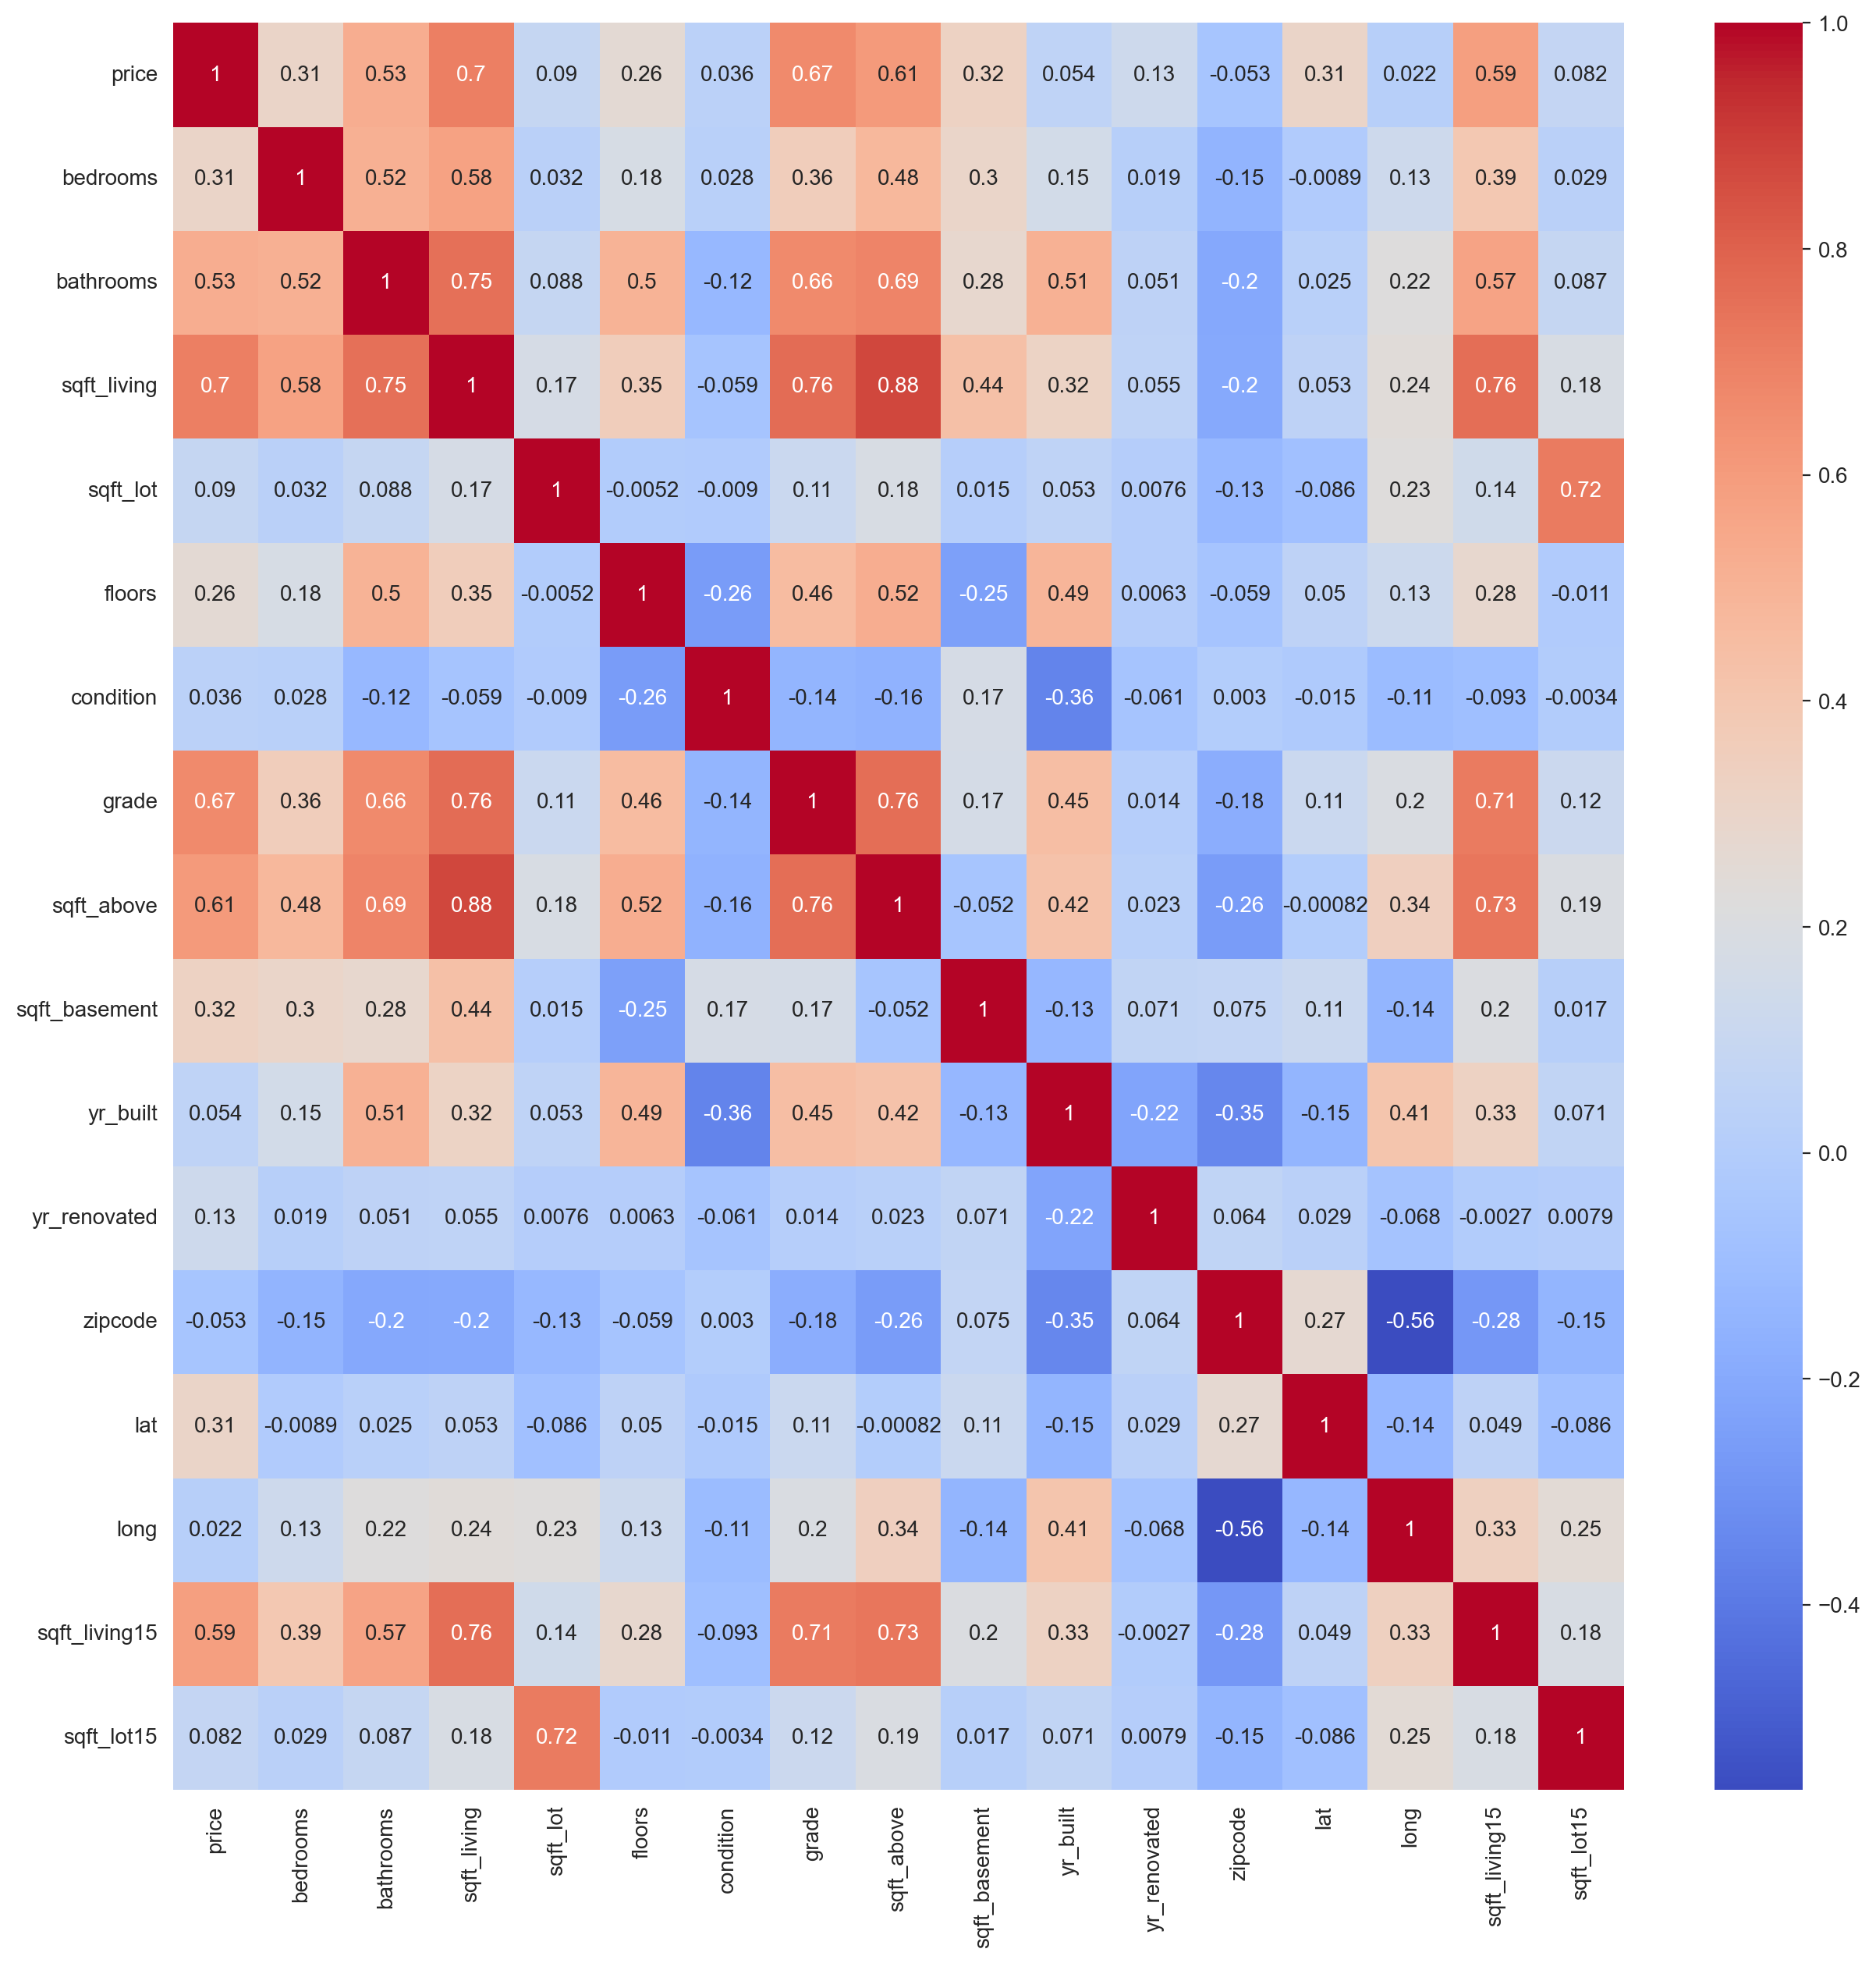

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(house_data.corr(),annot=True,cmap='coolwarm')
#plt.savefig('heatmap.png')

*** 2) JOINTPLOT BETWEEN AREA IN SQUARE FEET OF THE HOUSE AND PRICE ***

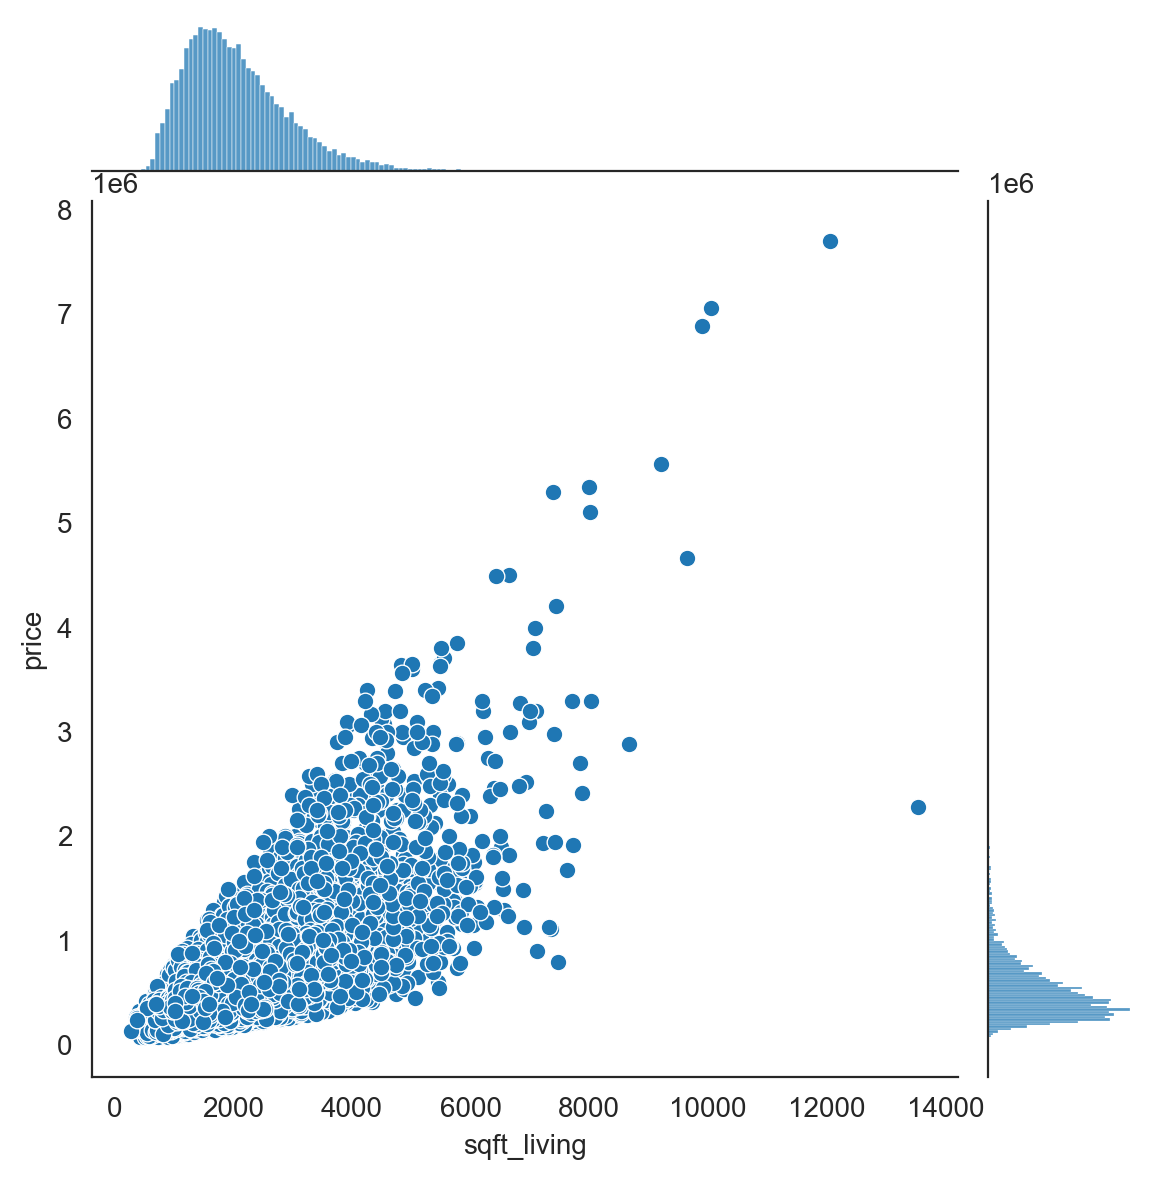

In [14]:
sns.jointplot(x='sqft_living',y='price',data=house_data)

#plt.savefig("jp1")

*** 2) JOINTPLOT BETWEEN AREA IN SQUARE FEET OF THE FLOORS ABOVE BASEMENT AND PRICE ***

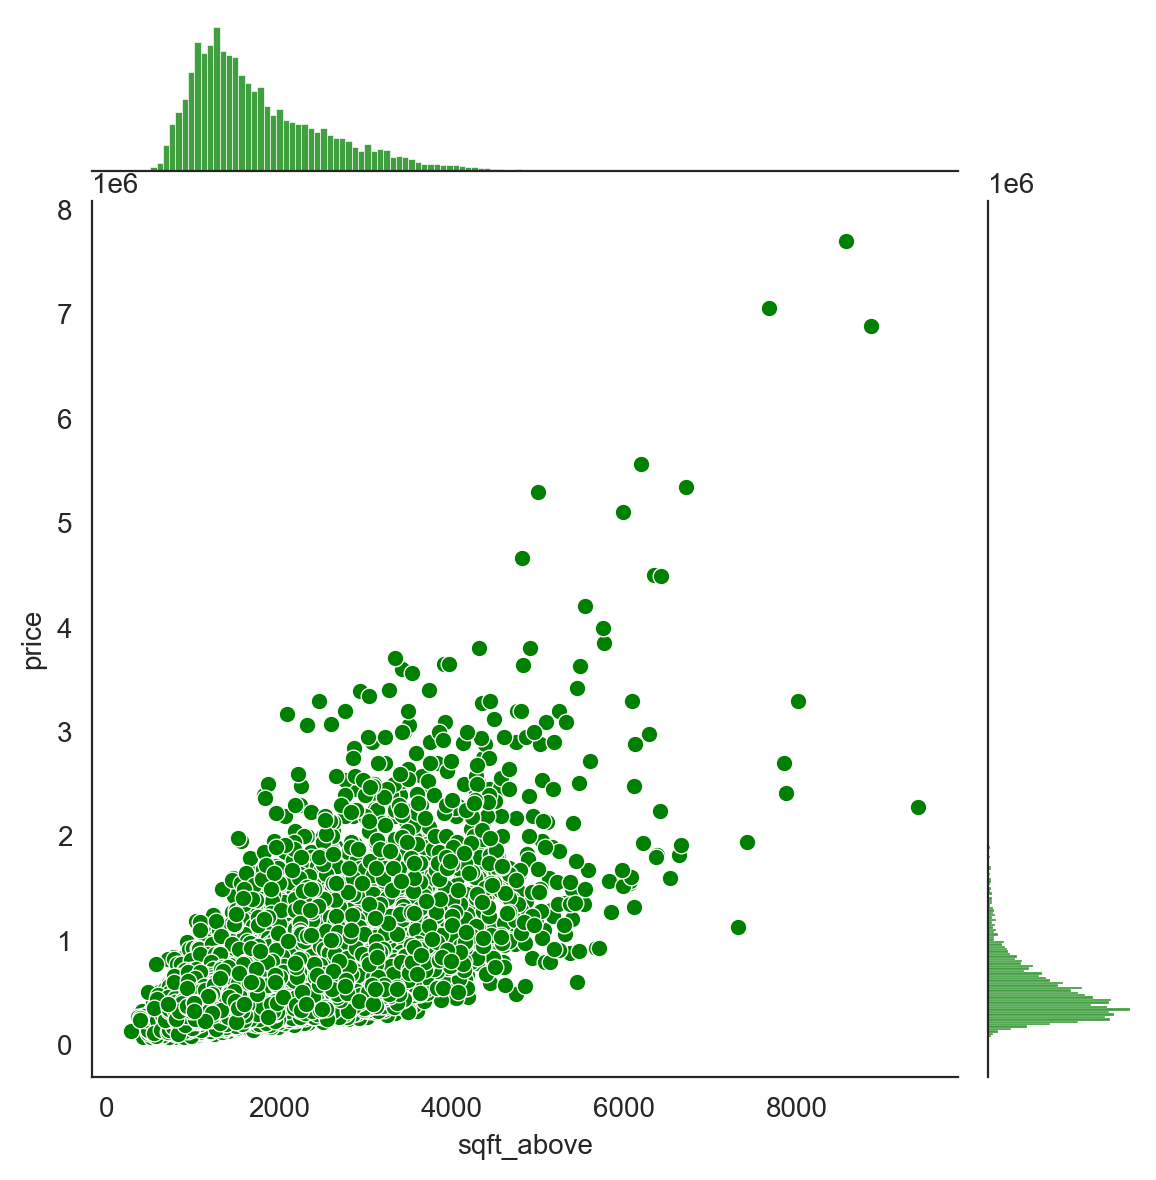

In [15]:
sns.jointplot(x='sqft_above',y='price',data=house_data,color='green')

*** 3) JOINTPLOT BETWEEN AREA IN SQUARE FEET OF THE BASEMENT VERSUS PRICE ***

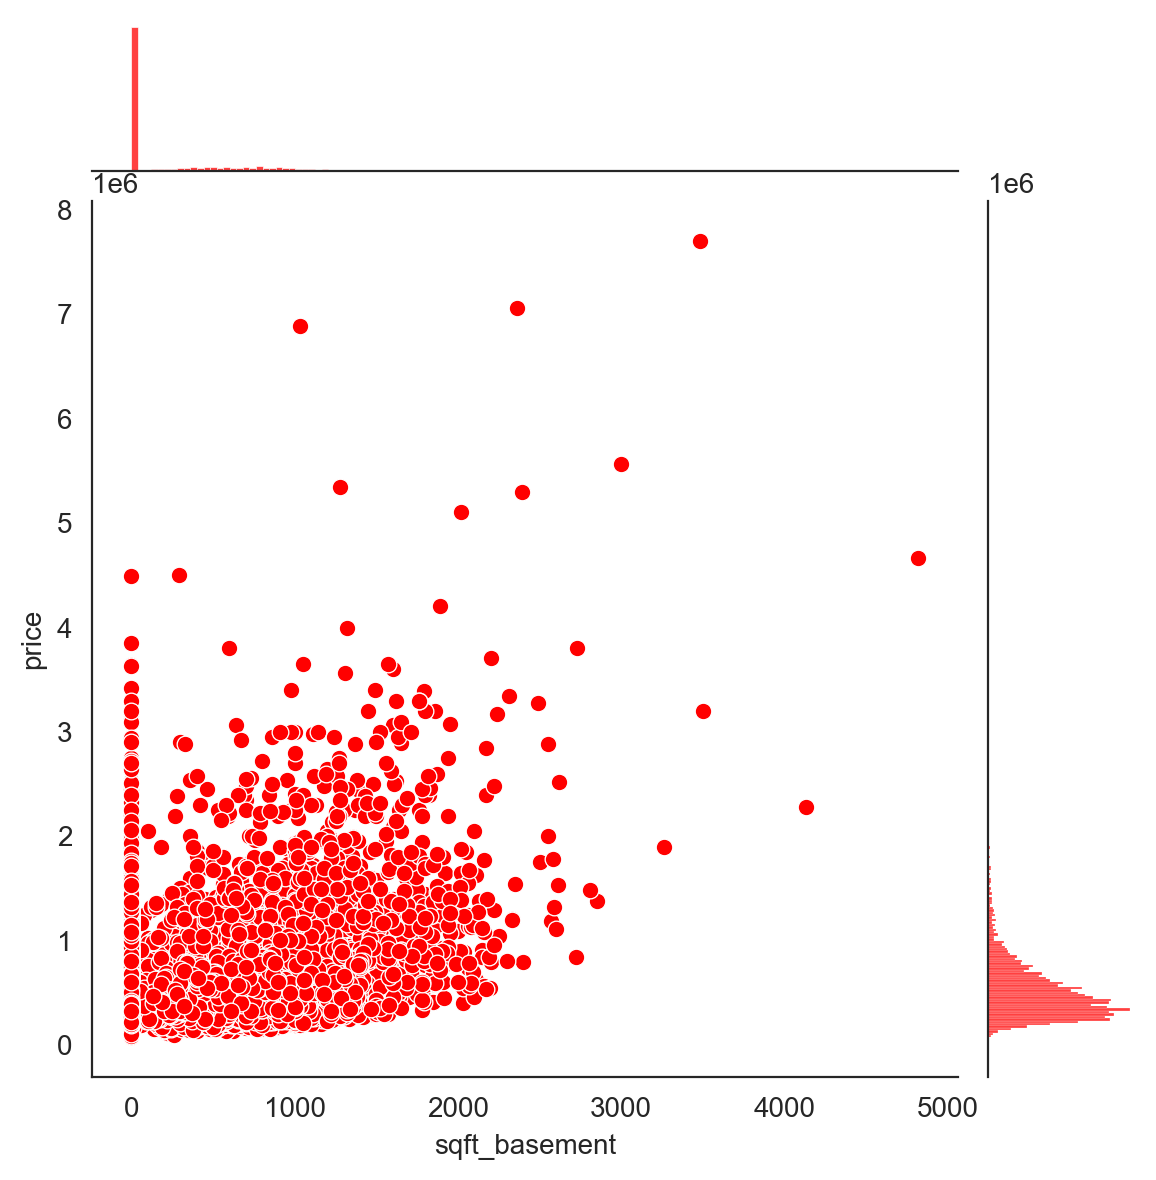

In [16]:
sns.jointplot(x='sqft_basement',y='price',data=house_data,color='red')

*** 4) HISTOGRAM TO ANALYSE THE NUMBER OF HOUSES BUILT OVER THE YEARS ***

In [17]:
house_data['yr_built'].iplot(kind='hist')


*** 5) BARPLOT BETWEEN NUMBER OF BEDROOMS AND PRICES ***

Text(0.5, 1.0, ' BARPLOT BETWEEN NUMBER OF BEDROOMS AND PRICES')

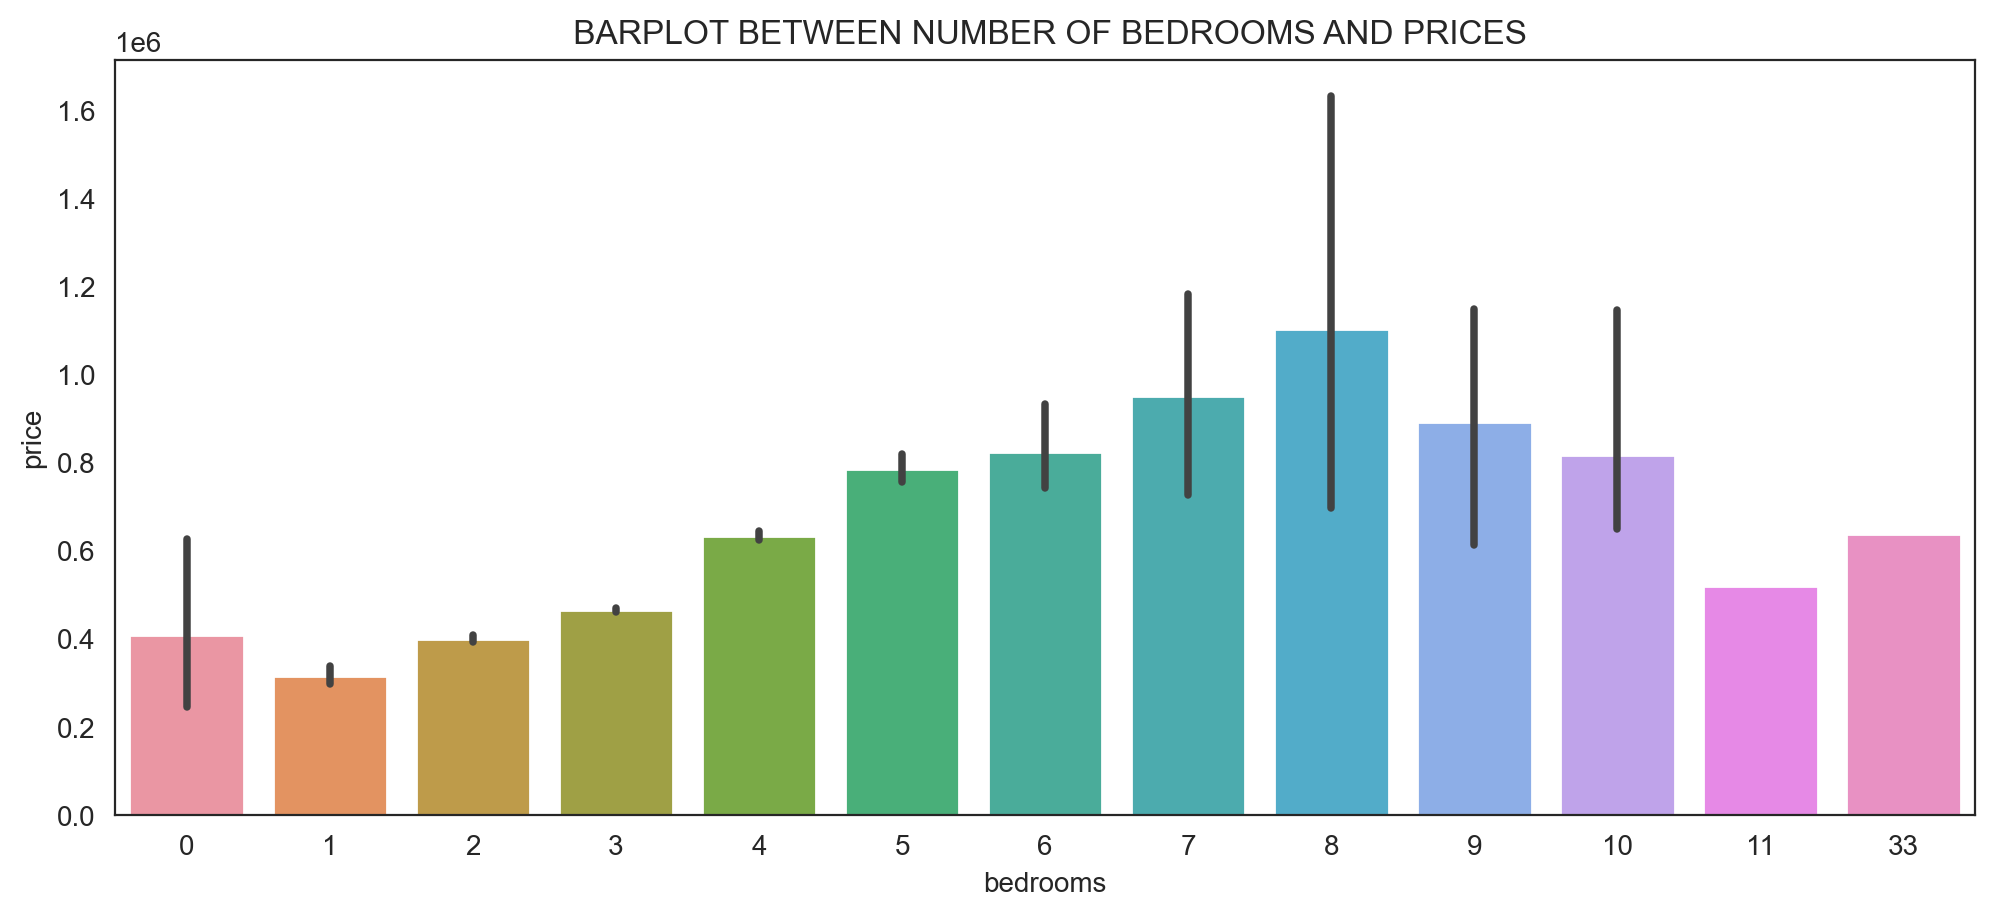

In [18]:
plt.figure(figsize=(12,5))
sns.barplot(x='bedrooms',y='price',data=house_data)
plt.title(" BARPLOT BETWEEN NUMBER OF BEDROOMS AND PRICES")

*** 6) COUNTPLOT OF NUMBER OF OF BEDROOMS ***

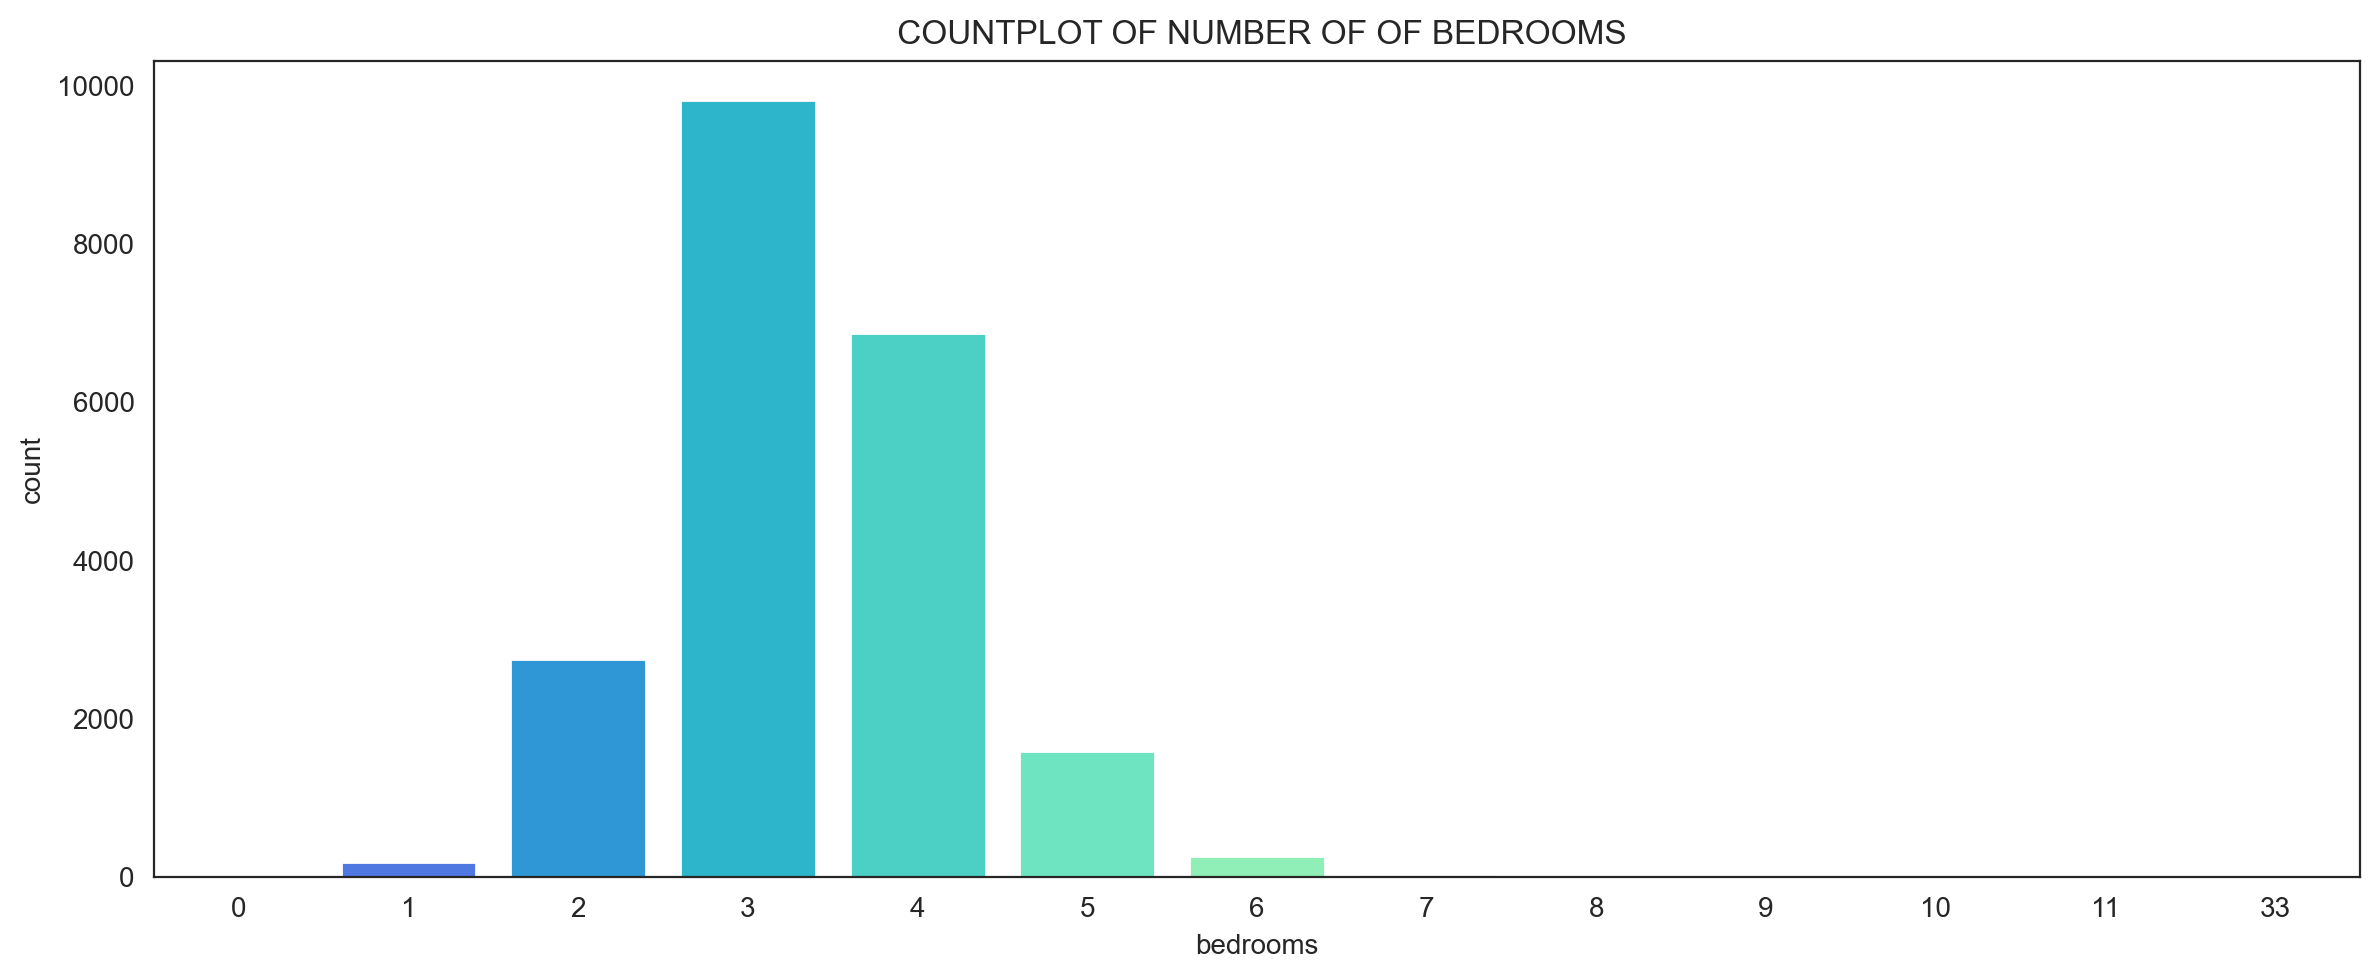

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(data=house_data,x='bedrooms',palette='rainbow')
plt.title(" COUNTPLOT OF NUMBER OF OF BEDROOMS")
plt.tight_layout()
plt.savefig("countplot")

*** 7) LINEAR MODEL PLOT BETWEEN NUMBER OF BATHROOMS AND SQUARE FEET OF AREA ABOVE BASEMENT, BASED ON THE GRADE OF THE HOUSE ***

Text(0.5, 1.0, 'LINEAR MODEL PLOT BETWEEN NUMBER OF BATHROOMS AND SQUARE FEET OF AREA ABOVE BASEMENT, BASED ON THE GRADE OF THE HOUSE')

<Figure size 4000x1000 with 0 Axes>

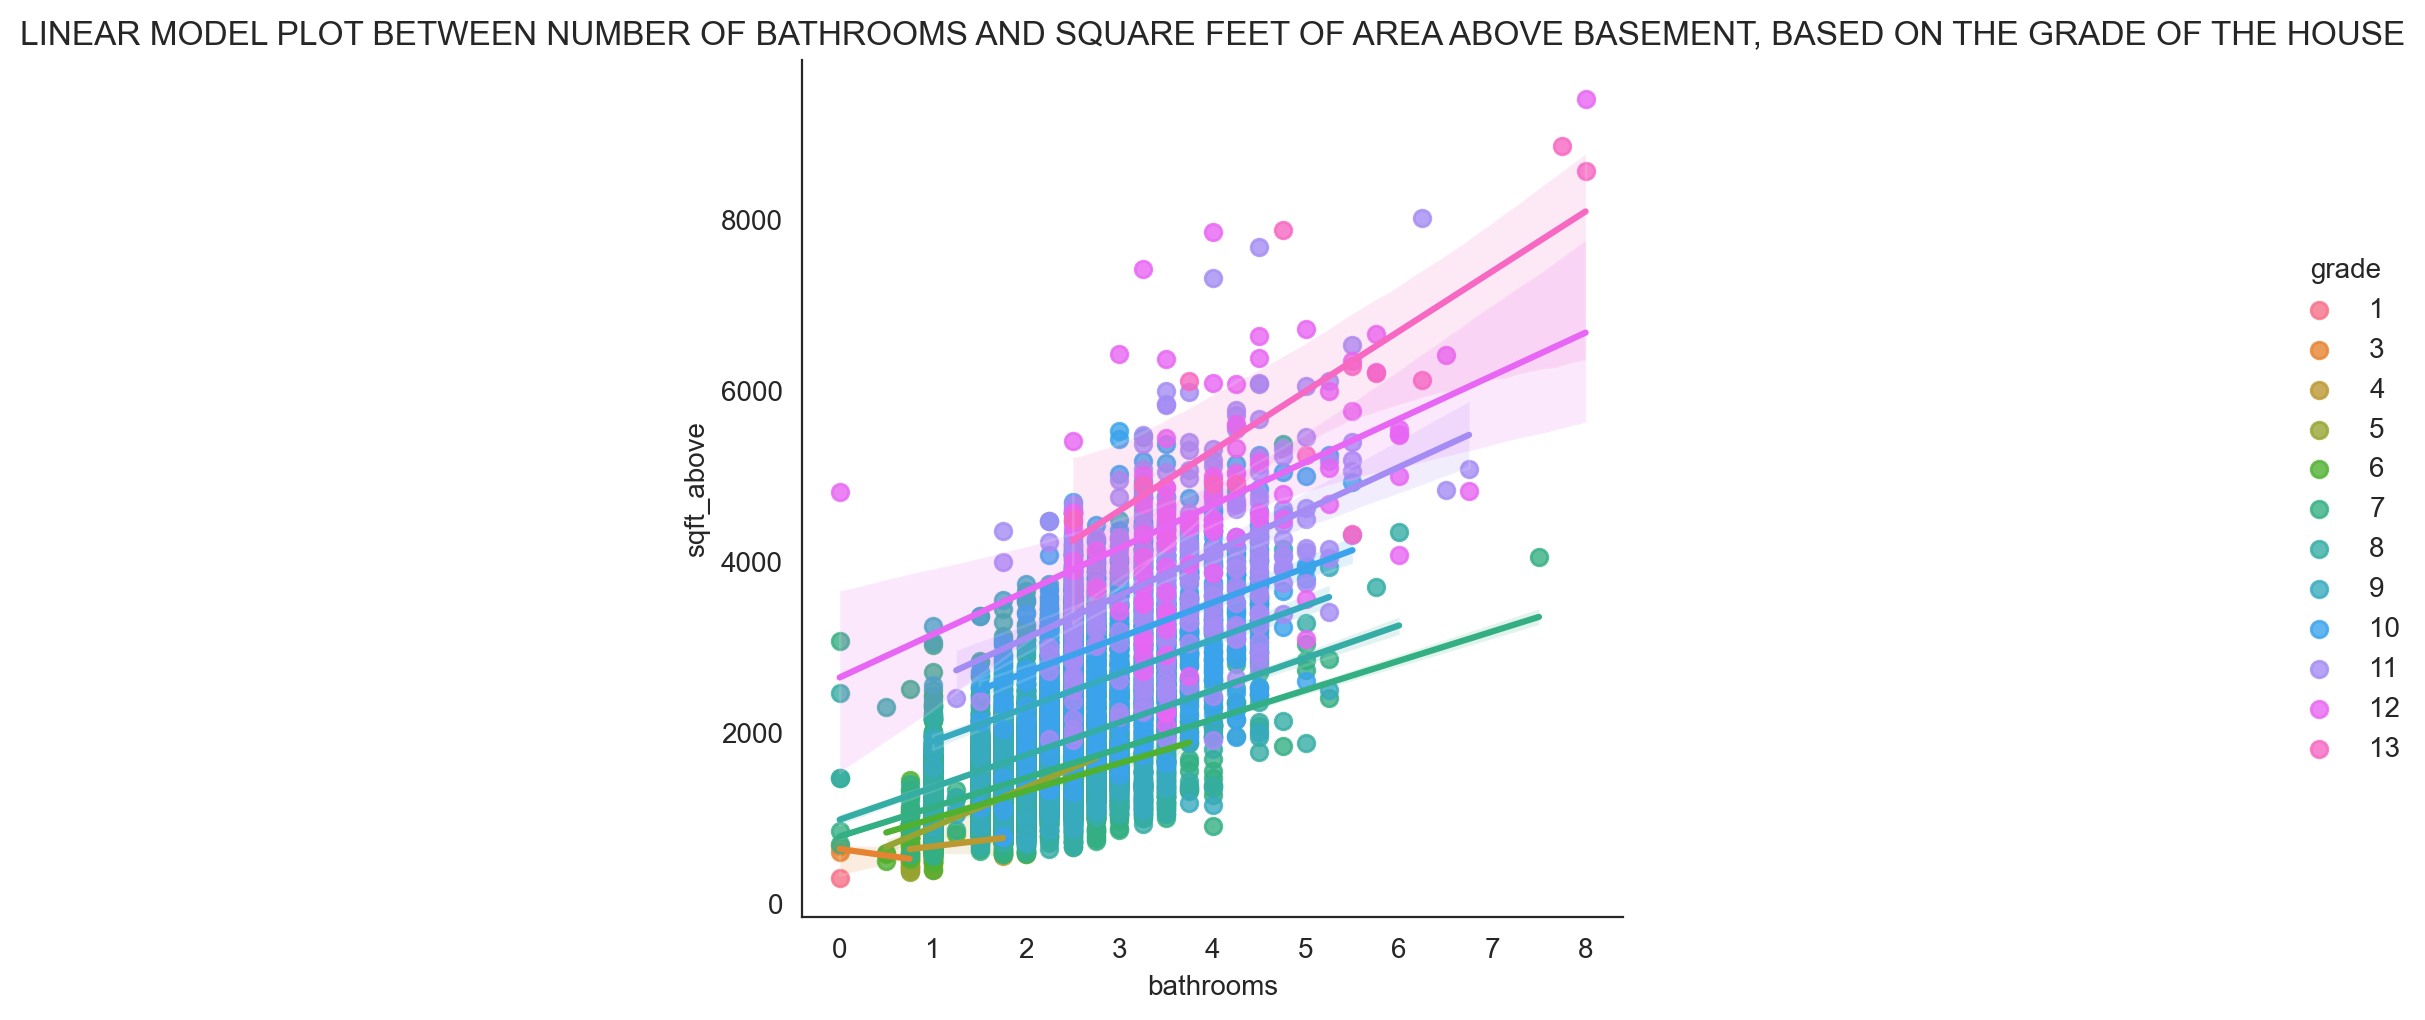

In [20]:
plt.figure(figsize=(20,5))
sns.lmplot(x='bathrooms',y='sqft_above',data=house_data,hue='grade')
plt.title("LINEAR MODEL PLOT BETWEEN NUMBER OF BATHROOMS AND SQUARE FEET OF AREA ABOVE BASEMENT, BASED ON THE GRADE OF THE HOUSE")
#plt.tight_layout()
#plt.savefig("lm1")

*** 8) LINEAR MODEL PLOT BETWEEN AREA OF THE HOUSE IN SQUARE FEET VERSUS PRICE, BASED ON THE CONDITION OF THE HOUSE***

Text(0.5, 1.0, ' LINEAR MODEL PLOT BETWEEN AREA OF THE HOUSE IN SQUARE FEET VERSUS PRICE, BASED ON THE GRADE OF THE HOUSE')

<Figure size 4000x1000 with 0 Axes>

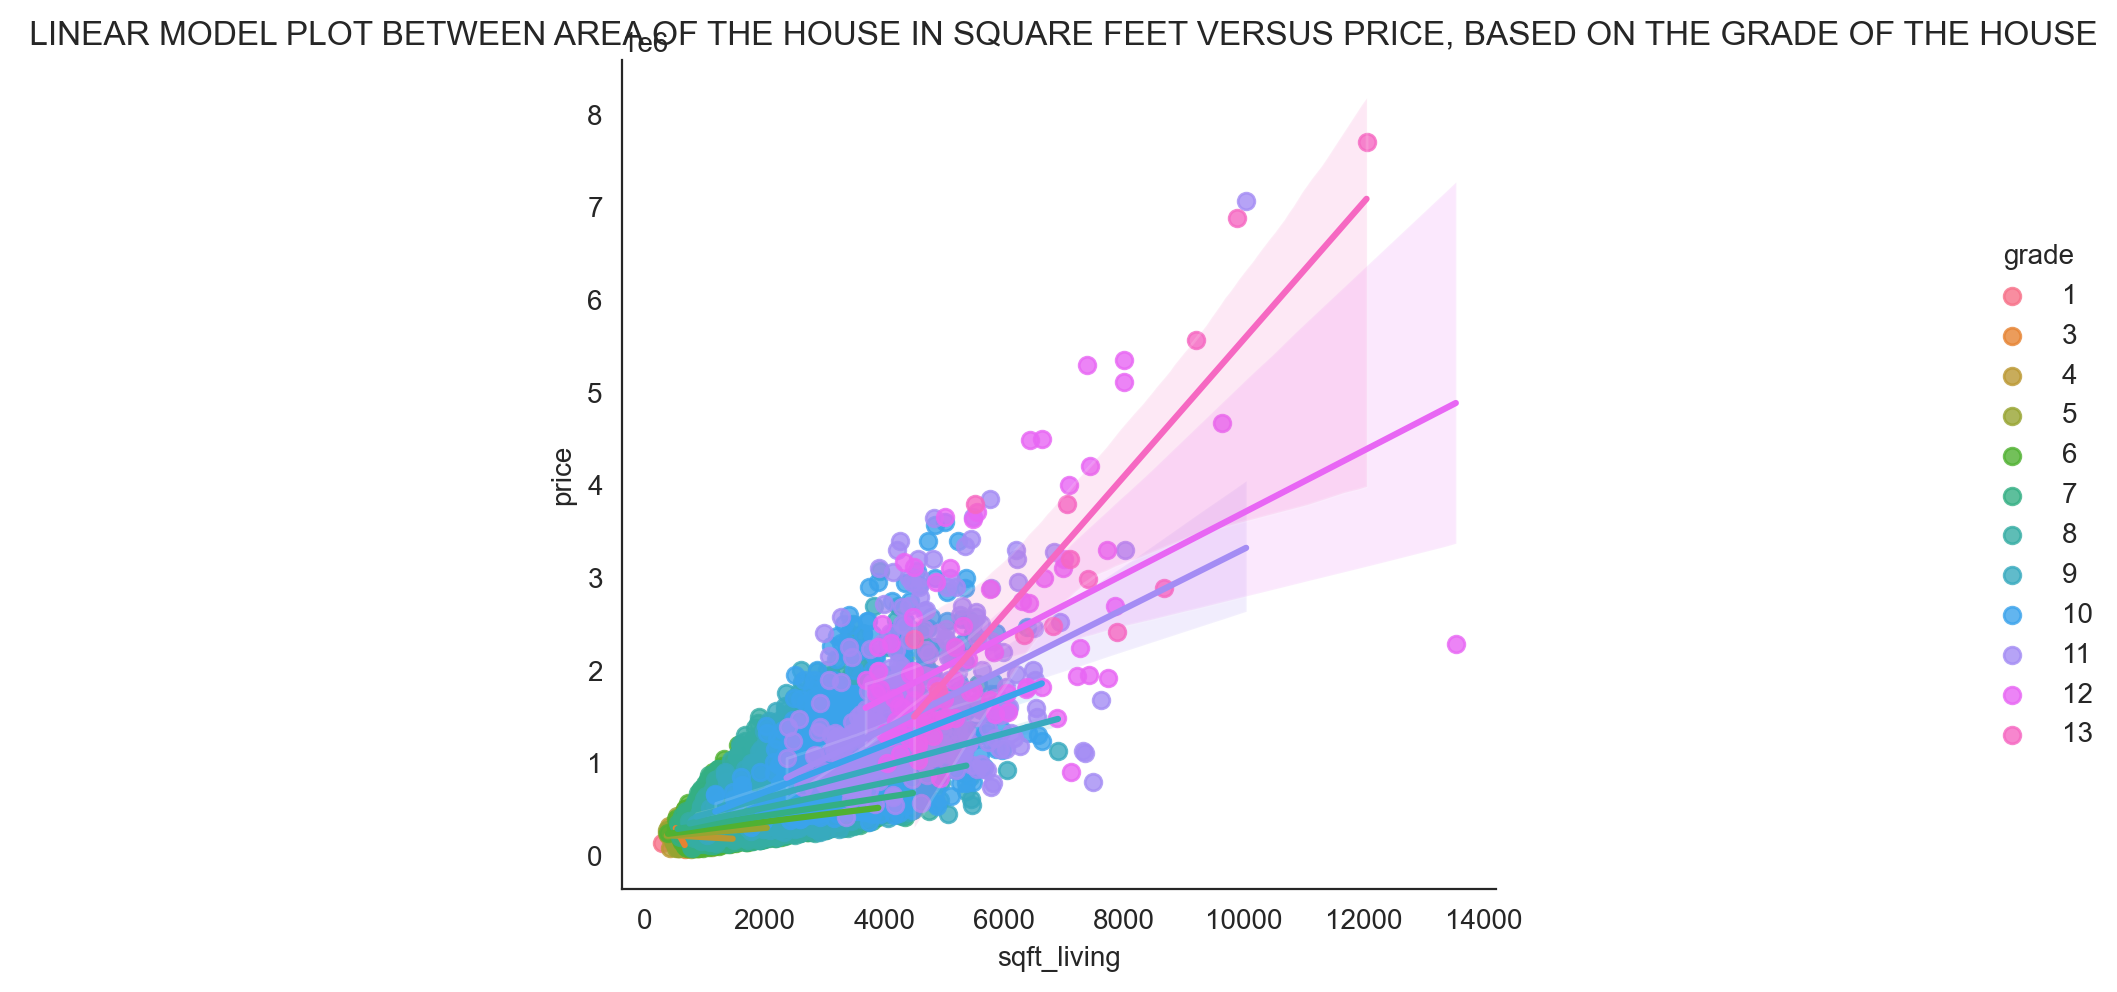

In [21]:
plt.figure(figsize=(20,5))
sns.lmplot(x='sqft_living',y='price',data=house_data,hue='grade')
plt.title(" LINEAR MODEL PLOT BETWEEN AREA OF THE HOUSE IN SQUARE FEET VERSUS PRICE, BASED ON THE GRADE OF THE HOUSE")
#plt.tight_layout()
#plt.savefig("lm2")

*** 9) BARPLOT OF CONDITION VERSUS PRICE ***

Text(0.5, 1.0, 'BARPLOT OF CONDITION VERSUS PRICE')

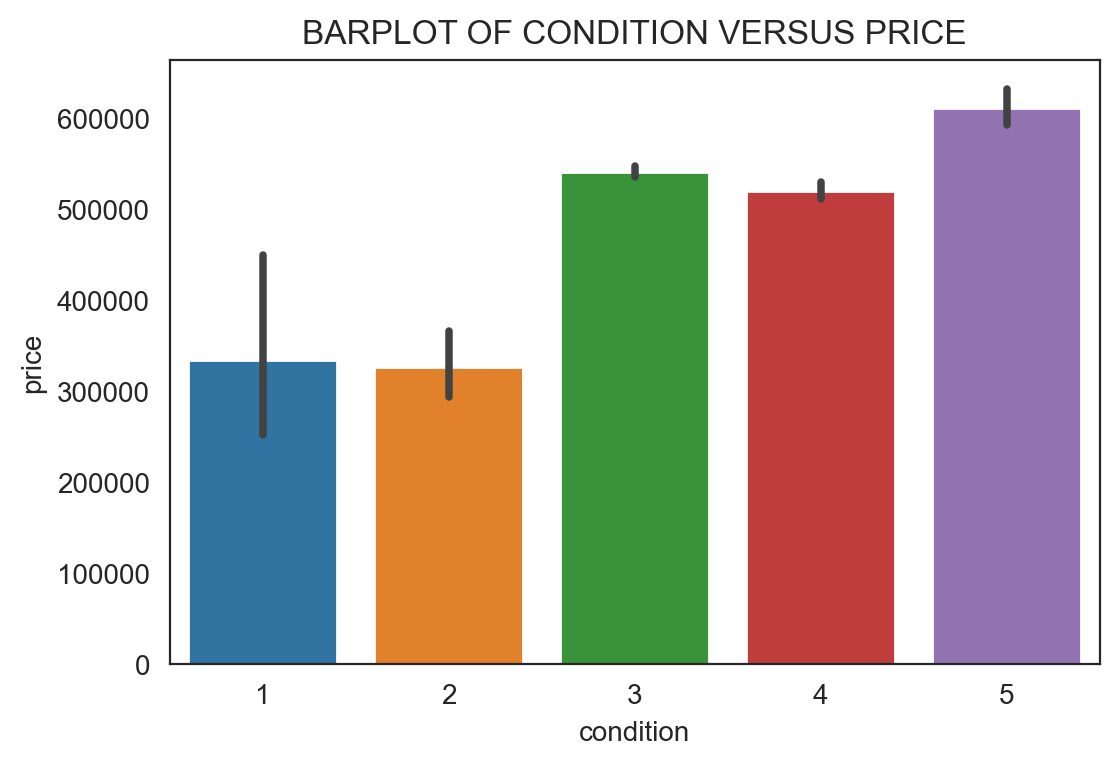

In [22]:
sns.barplot(x='condition',y='price',data=house_data)
plt.title("BARPLOT OF CONDITION VERSUS PRICE")

*** 10) NORMAL DISTRIBUTION OF PRICES ***

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'NORMAL DISTRIBUTION OF PRICES')

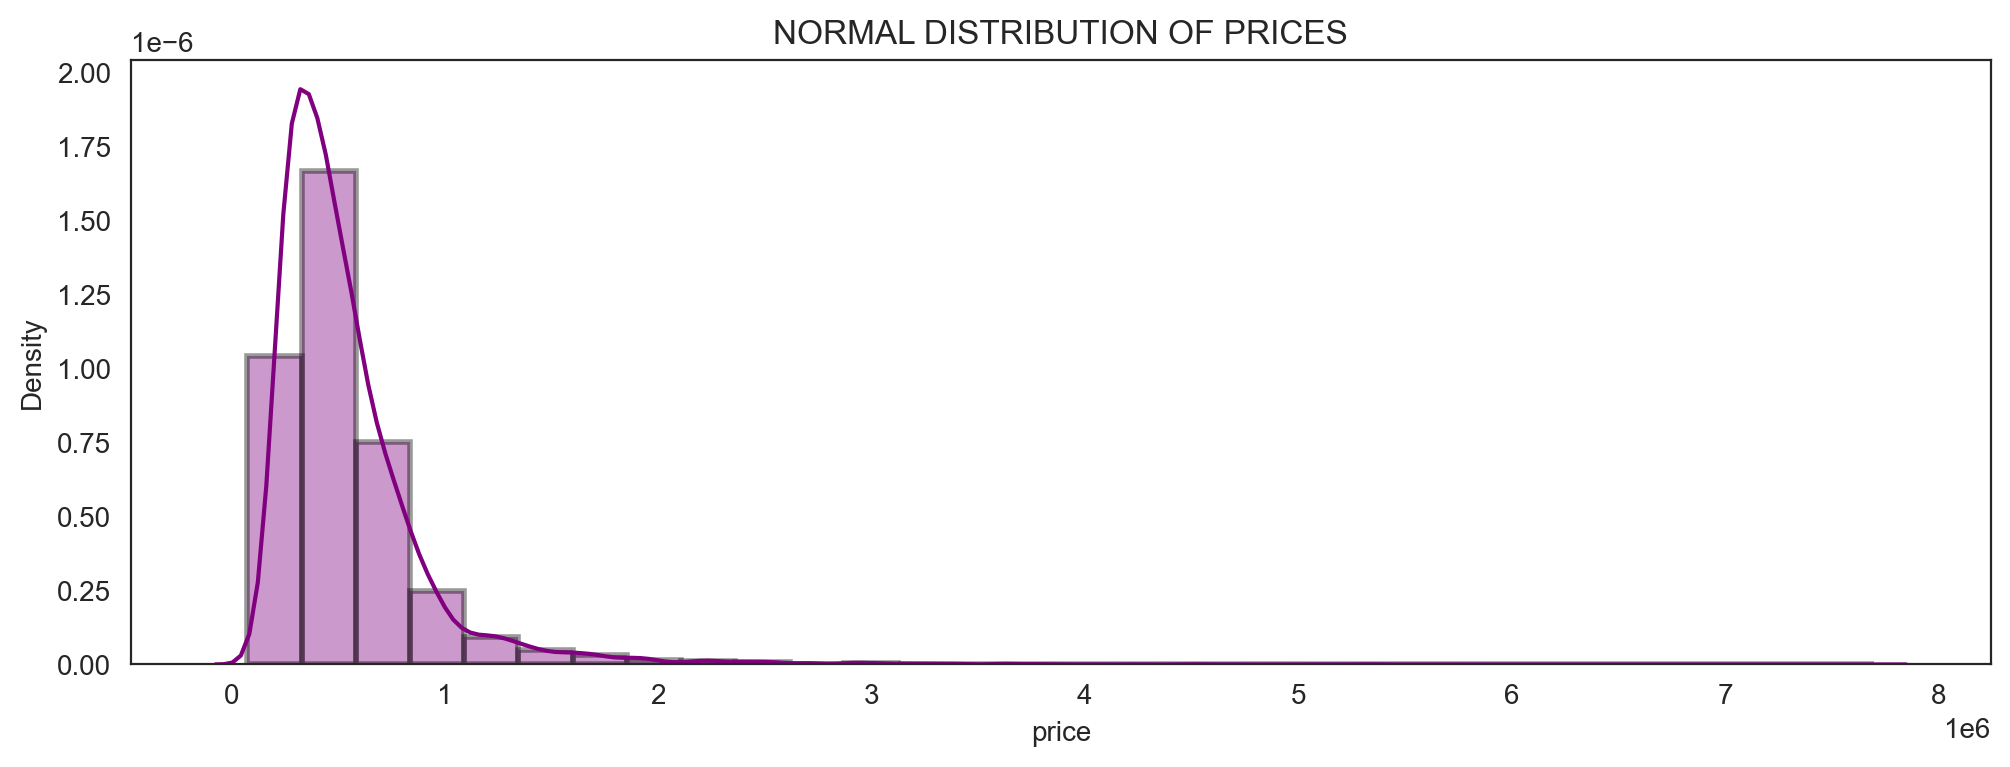

In [23]:
plt.figure(figsize=(12,4))
sns.distplot(house_data['price'],bins=30,color='purple',hist_kws=dict(edgecolor="k", linewidth=2))
plt.title("NORMAL DISTRIBUTION OF PRICES")

# MACHINE LEARNING 

# SUPERVISED LEARNING ALGORITHM - REGRESSION


*** 1) LINEAR REGRESSION ***

In [24]:
house_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [25]:
X=house_data[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built','yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]

In [26]:
y=house_data['price']


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(Xtrain,ytrain)

LinearRegression()

In [32]:
type(lm.coef_)

numpy.ndarray

In [33]:
y_predicted=lm.predict(Xtest)

*** NUMPY ARRAY OF PREDICTED PRICES ***

In [34]:
y_predicted

array([598046.40479249, 439589.64295687, 362487.82727641, ...,
       761599.18557365, 270527.56883937, 708940.42948244])

In [35]:
df_results = pd.DataFrame({'Actual': ytest, 'Predicted': y_predicted})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
df_results

,Actual,Predicted,Residuals
5004,525000.0,5.980464e+05,-73046.404792
2934,380000.0,4.395896e+05,-59589.642957
18340,470000.0,3.624878e+05,107512.172724
16805,1017100.0,1.156525e+06,-139425.159817
154,350000.0,3.716274e+05,-21627.392867
...,...,...,...
20286,382495.0,2.805455e+05,101949.501054
3218,405000.0,6.019522e+05,-196952.192320
5471,810000.0,7.615992e+05,48400.814426
18553,339000.0,2.705276e+05,68472.431161


*** PERFORMANCE EVALUATION USING MEAN AVERAGE ERROR, MEAN SQUARE ERROR AND ROOT MEAN SQUARE ERROR ***

In [36]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(ytest,y_predicted))
print("MSE:", metrics.mean_squared_error(ytest,y_predicted))
print("RMSE:", np.sqrt(metrics.mean_squared_error(ytest,y_predicted)))
print(metrics.explained_variance_score(ytest,y_predicted))

MAE: 131895.9234682586
MSE: 47562506509.65105
RMSE: 218088.29979999168
0.6620768224775888


*** NORMAL DISTRIBUTION OF ERROR (TEST PRICE- PREDICTED PRICE) ***

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



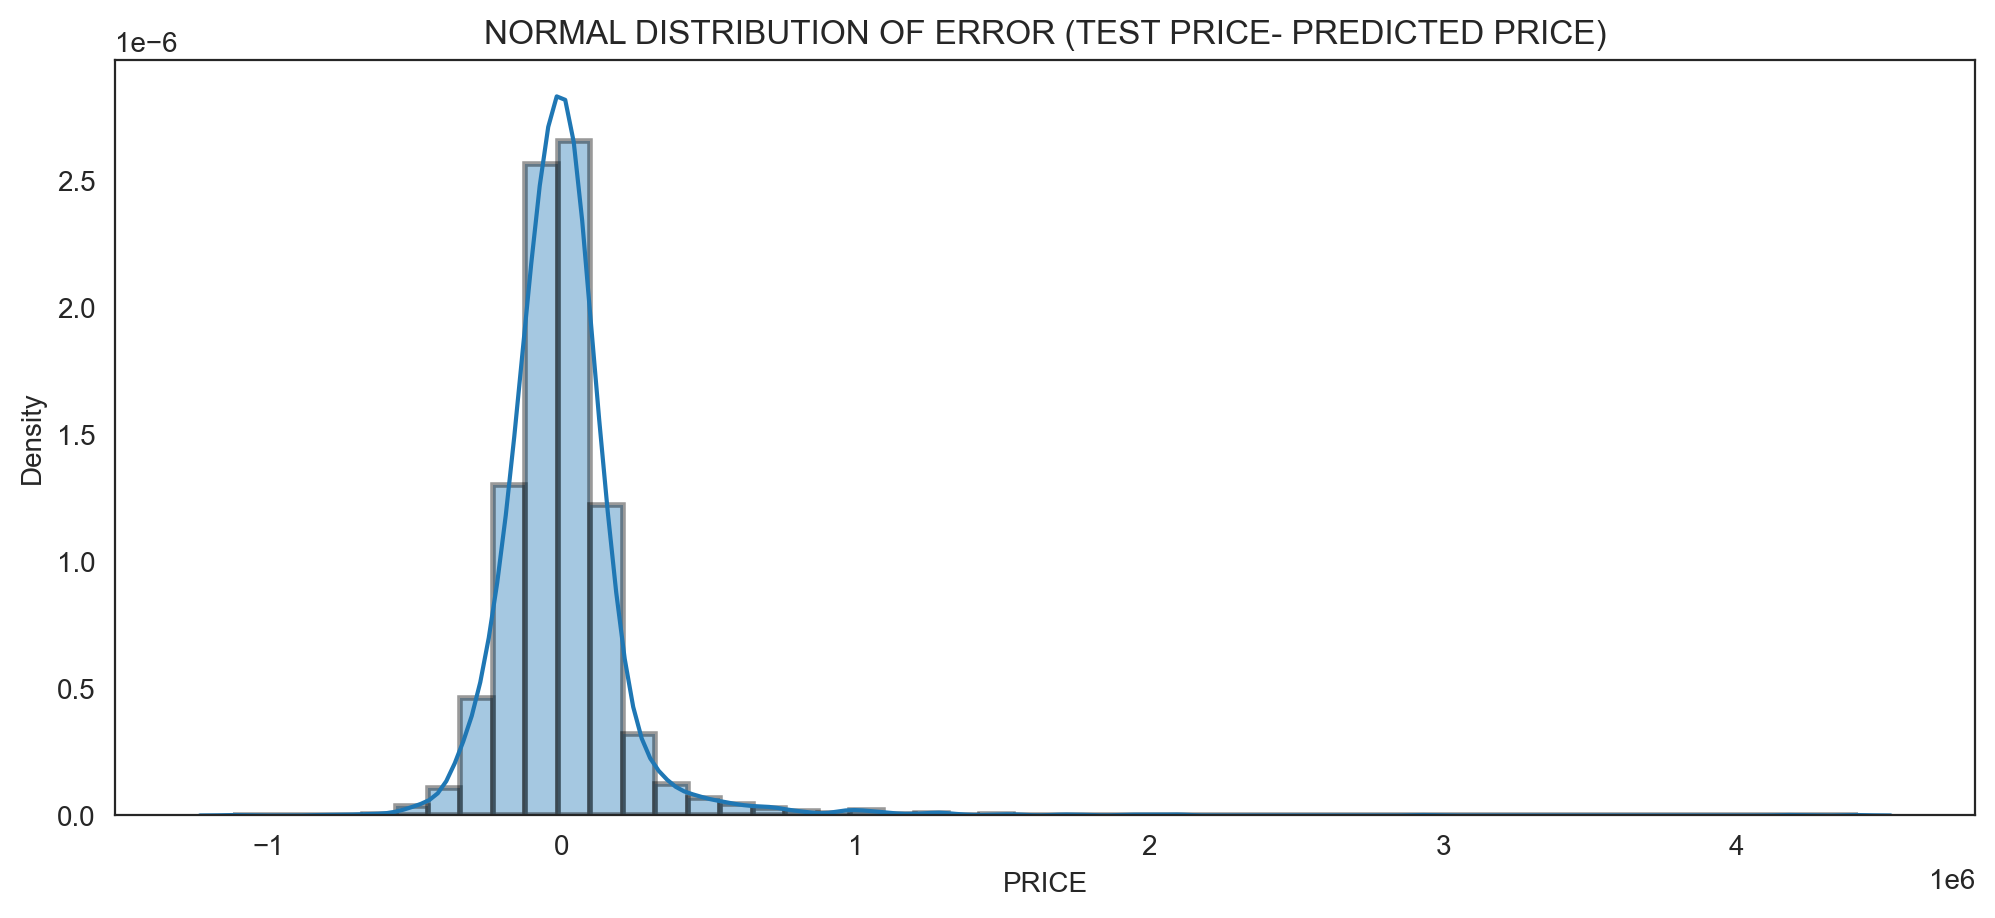

In [37]:
plt.figure(figsize=(12,5))
sns.distplot((ytest-y_predicted),bins=50,hist_kws=dict(edgecolor="k", linewidth=2));
plt.xlabel("PRICE")
plt.title("NORMAL DISTRIBUTION OF ERROR (TEST PRICE- PREDICTED PRICE)")
plt.savefig("lr1")

***LINEAR REGRESSION CURVE***

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'LINEAR REGRESSION CURVE')

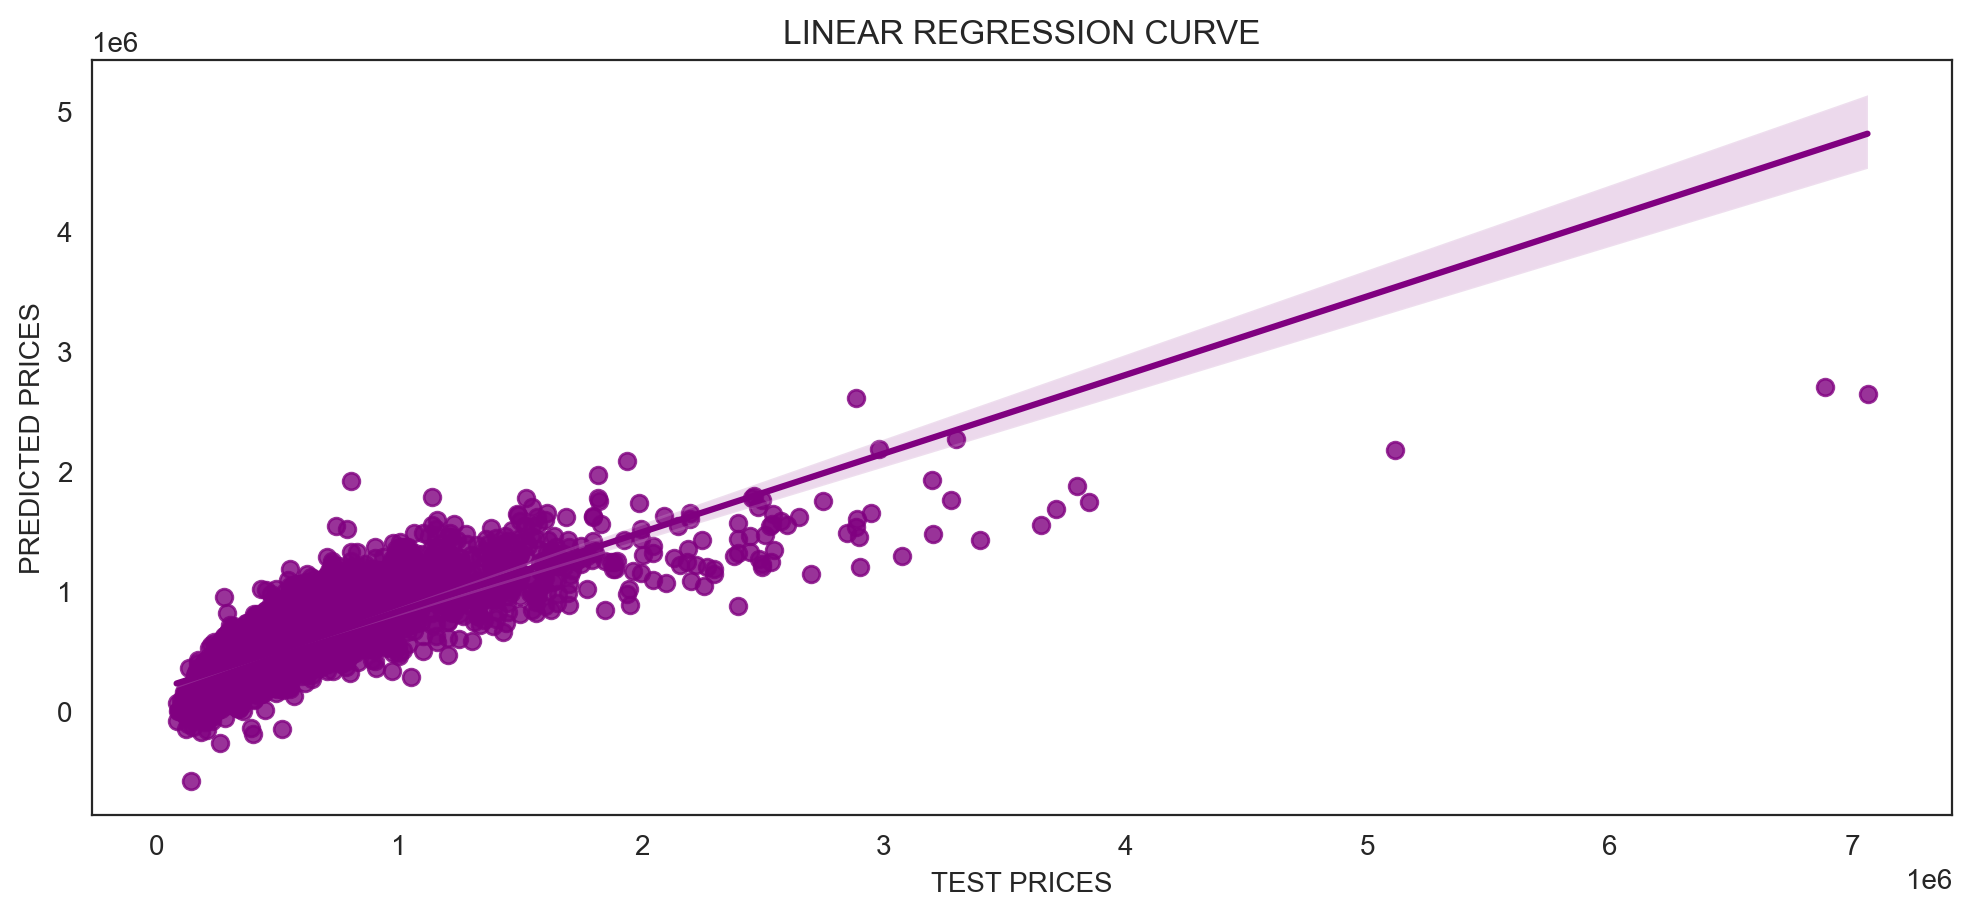

In [38]:
plt.figure(figsize=(12,5))
sns.regplot(ytest,y_predicted,house_data,color='purple')
plt.xlabel("TEST PRICES")
plt.ylabel("PREDICTED PRICES")
plt.title("LINEAR REGRESSION CURVE")
#plt.savefig("lr3")

# Scale Data

In [39]:
col_list = list(house_data.columns.values)

In [40]:
col_list

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [41]:
df_train = house_data.copy()

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [43]:
df_train.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,-1.833746e-16,-1.254167e-15,-1.051951e-15,3.174253e-16,3.281921e-17,-1.753125e-14,-2.636807e-15,-2.328998e-15,3.892022e-16,-2.022801e-15,3.592925e-15,4.348961e-15,-8.953095e-14,-3.432958e-14,-3.663944e-14,-1.506632e-16,1.235382e-16
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-1.266860e+00,-3.624404e+00,-2.745920e+00,-1.948891e+00,-3.521759e-01,-9.154270e-01,-3.702668e+00,-5.663344e+00,-1.809494e+00,-6.586810e-01,-2.417383e+00,-2.101284e-01,-1.438025e+00,-2.916795e+00,-2.166543e+00,-2.316325e+00,-4.438052e-01
25%,-5.941897e-01,-3.987371e-01,-4.736214e-01,-7.108948e-01,-2.430487e-01,-9.154270e-01,-6.291869e-01,-5.588357e-01,-7.226314e-01,-6.586810e-01,-6.810785e-01,-2.101284e-01,-8.399369e-01,-6.426977e-01,-8.102505e-01,-7.244971e-01,-2.808593e-01
50%,-2.453924e-01,-3.987371e-01,1.756067e-01,-1.849914e-01,-1.808075e-01,1.053939e-02,-6.291869e-01,-5.588357e-01,-2.758102e-01,-6.586810e-01,1.360059e-01,-2.101284e-01,-2.418484e-01,8.478232e-02,-1.143518e-01,-2.138280e-01,-1.885636e-01
75%,2.857709e-01,6.764851e-01,5.002207e-01,5.118578e-01,-1.066880e-01,9.365058e-01,9.075535e-01,2.919156e-01,5.091458e-01,6.066704e-01,8.849999e-01,-2.101284e-01,7.487357e-01,8.512345e-01,6.312541e-01,5.448802e-01,-9.835556e-02
max,1.950299e+01,3.185793e+01,7.641730e+00,1.247807e+01,3.950434e+01,3.714405e+00,2.444294e+00,4.545672e+00,9.204044e+00,1.023238e+01,1.497813e+00,4.806428e+00,2.262647e+00,1.570054e+00,6.383070e+00,6.162239e+00,3.144029e+01


In [44]:
X=df_train[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built','yr_renovated',
       'sqft_living15', 'sqft_lot15']]

In [45]:
y=df_train['price']


In [46]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)

In [47]:
lm_2 = LinearRegression()

In [48]:
lm_2.fit(Xtrain,ytrain)

LinearRegression()

In [49]:
y_predicted_2=lm_2.predict(Xtest)

In [50]:
df_results = pd.DataFrame({'Actual': ytest, 'Predicted': y_predicted_2})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
df_results

,Actual,Predicted,Residuals
7583,-0.436339,-0.481559,-0.045220
6628,0.844173,2.132921,-1.288748
17380,-0.626740,-0.524015,0.102726
14551,-0.264732,-0.512011,-0.247279
17663,0.054102,-0.213513,-0.159411
...,...,...,...
11140,-0.782004,-0.499055,0.282949
2581,0.421967,-0.247894,0.174072
8003,0.871413,0.505429,0.365983
16675,-0.205623,-0.215002,-0.009378


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'LINEAR REGRESSION CURVE')

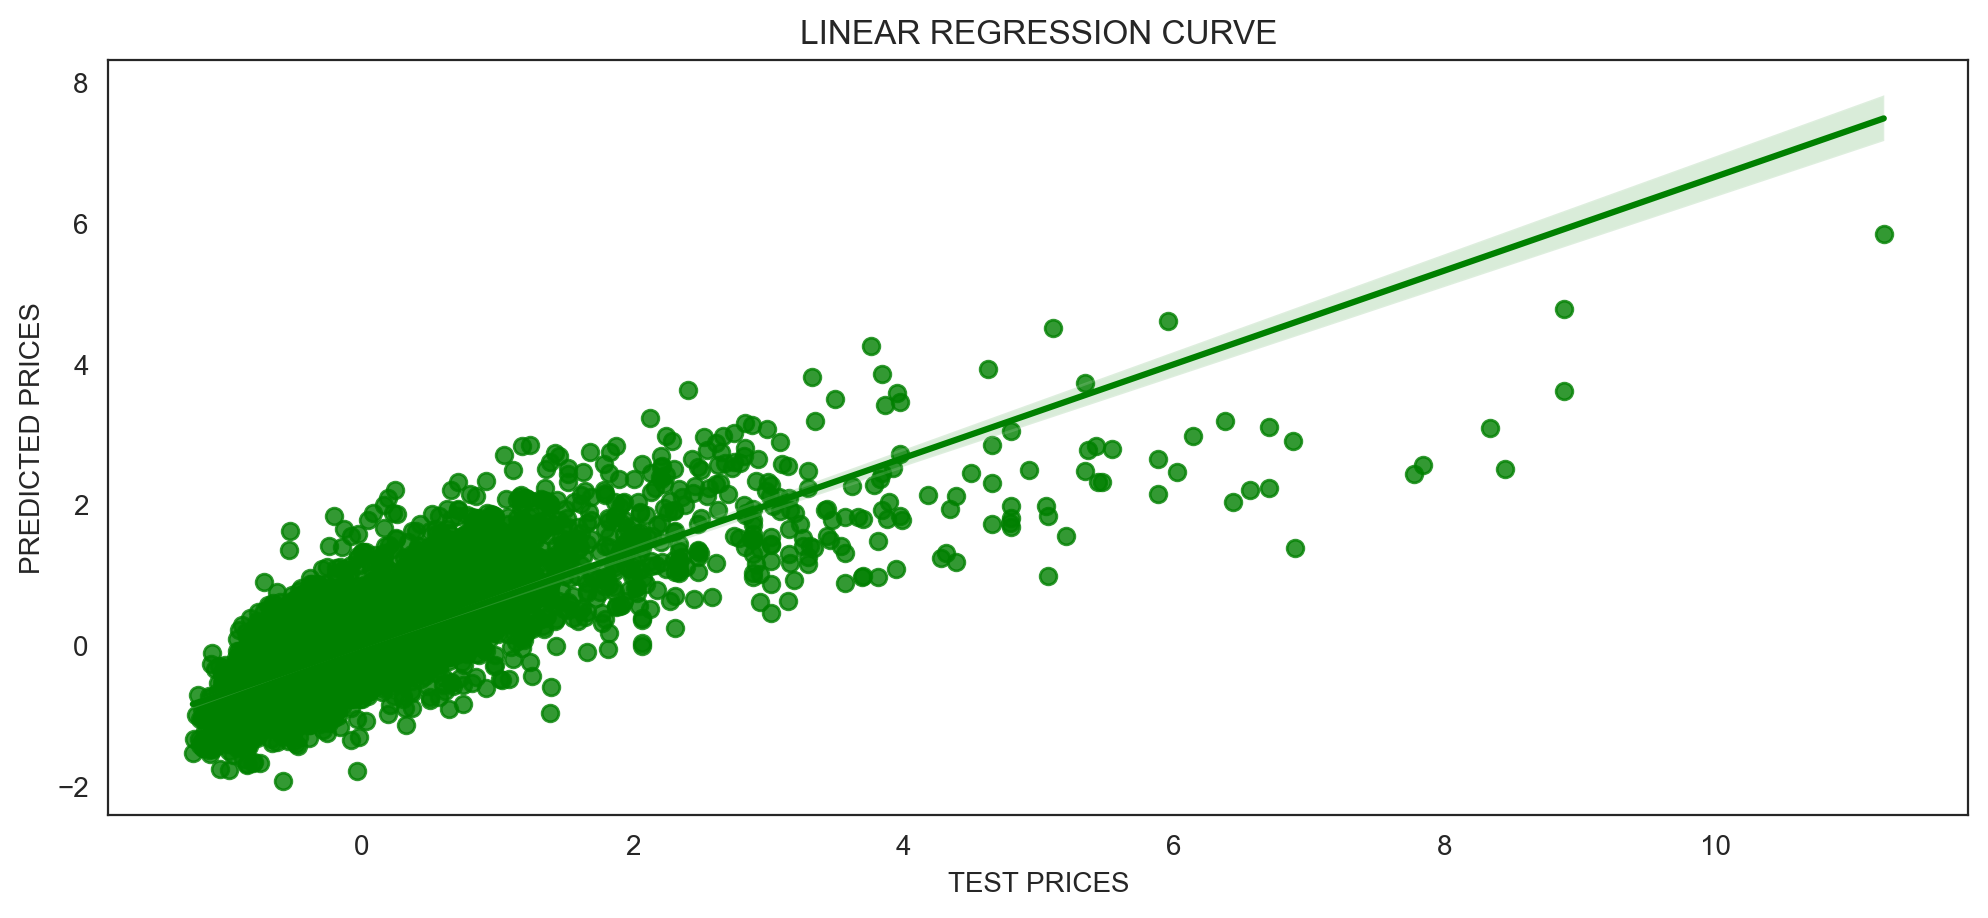

In [51]:
plt.figure(figsize=(12,5))
sns.regplot(ytest,y_predicted_2,df_train,color='green')
plt.xlabel("TEST PRICES")
plt.ylabel("PREDICTED PRICES")
plt.title("LINEAR REGRESSION CURVE")
#plt.savefig("lr3")

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV


rfr = RandomForestRegressor(n_estimators = 300, max_depth = 5, min_samples_leaf= 5, max_features = 'sqrt')  # using GridSearch
rfr = RandomForestRegressor()

#Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)
rfr.fit(Xtrain, ytrain) # gets the parameters for the rfr model

rfr_cv = cross_val_score(rfr,Xtrain, ytrain, cv = 5, scoring = 'r2')
print("R2: ", rfr_cv.mean())

R2:  0.7144104500049282


In [53]:
importance = rfr.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, Xtrain.columns)
#list(feature_importances)

sorted_feature_importances = sorted(feature_importances, reverse = True)
#print(sorted_feature_importances)

top_10_predictors = sorted_feature_importances[0:10]
values = [value for value, predictors in top_10_predictors]
predictors = [predictors for value, predictors in top_10_predictors]
print(predictors)

['sqft_living', 'grade', 'yr_built', 'sqft_living15', 'sqft_lot15', 'sqft_lot', 'sqft_above', 'bathrooms', 'sqft_basement', 'condition']


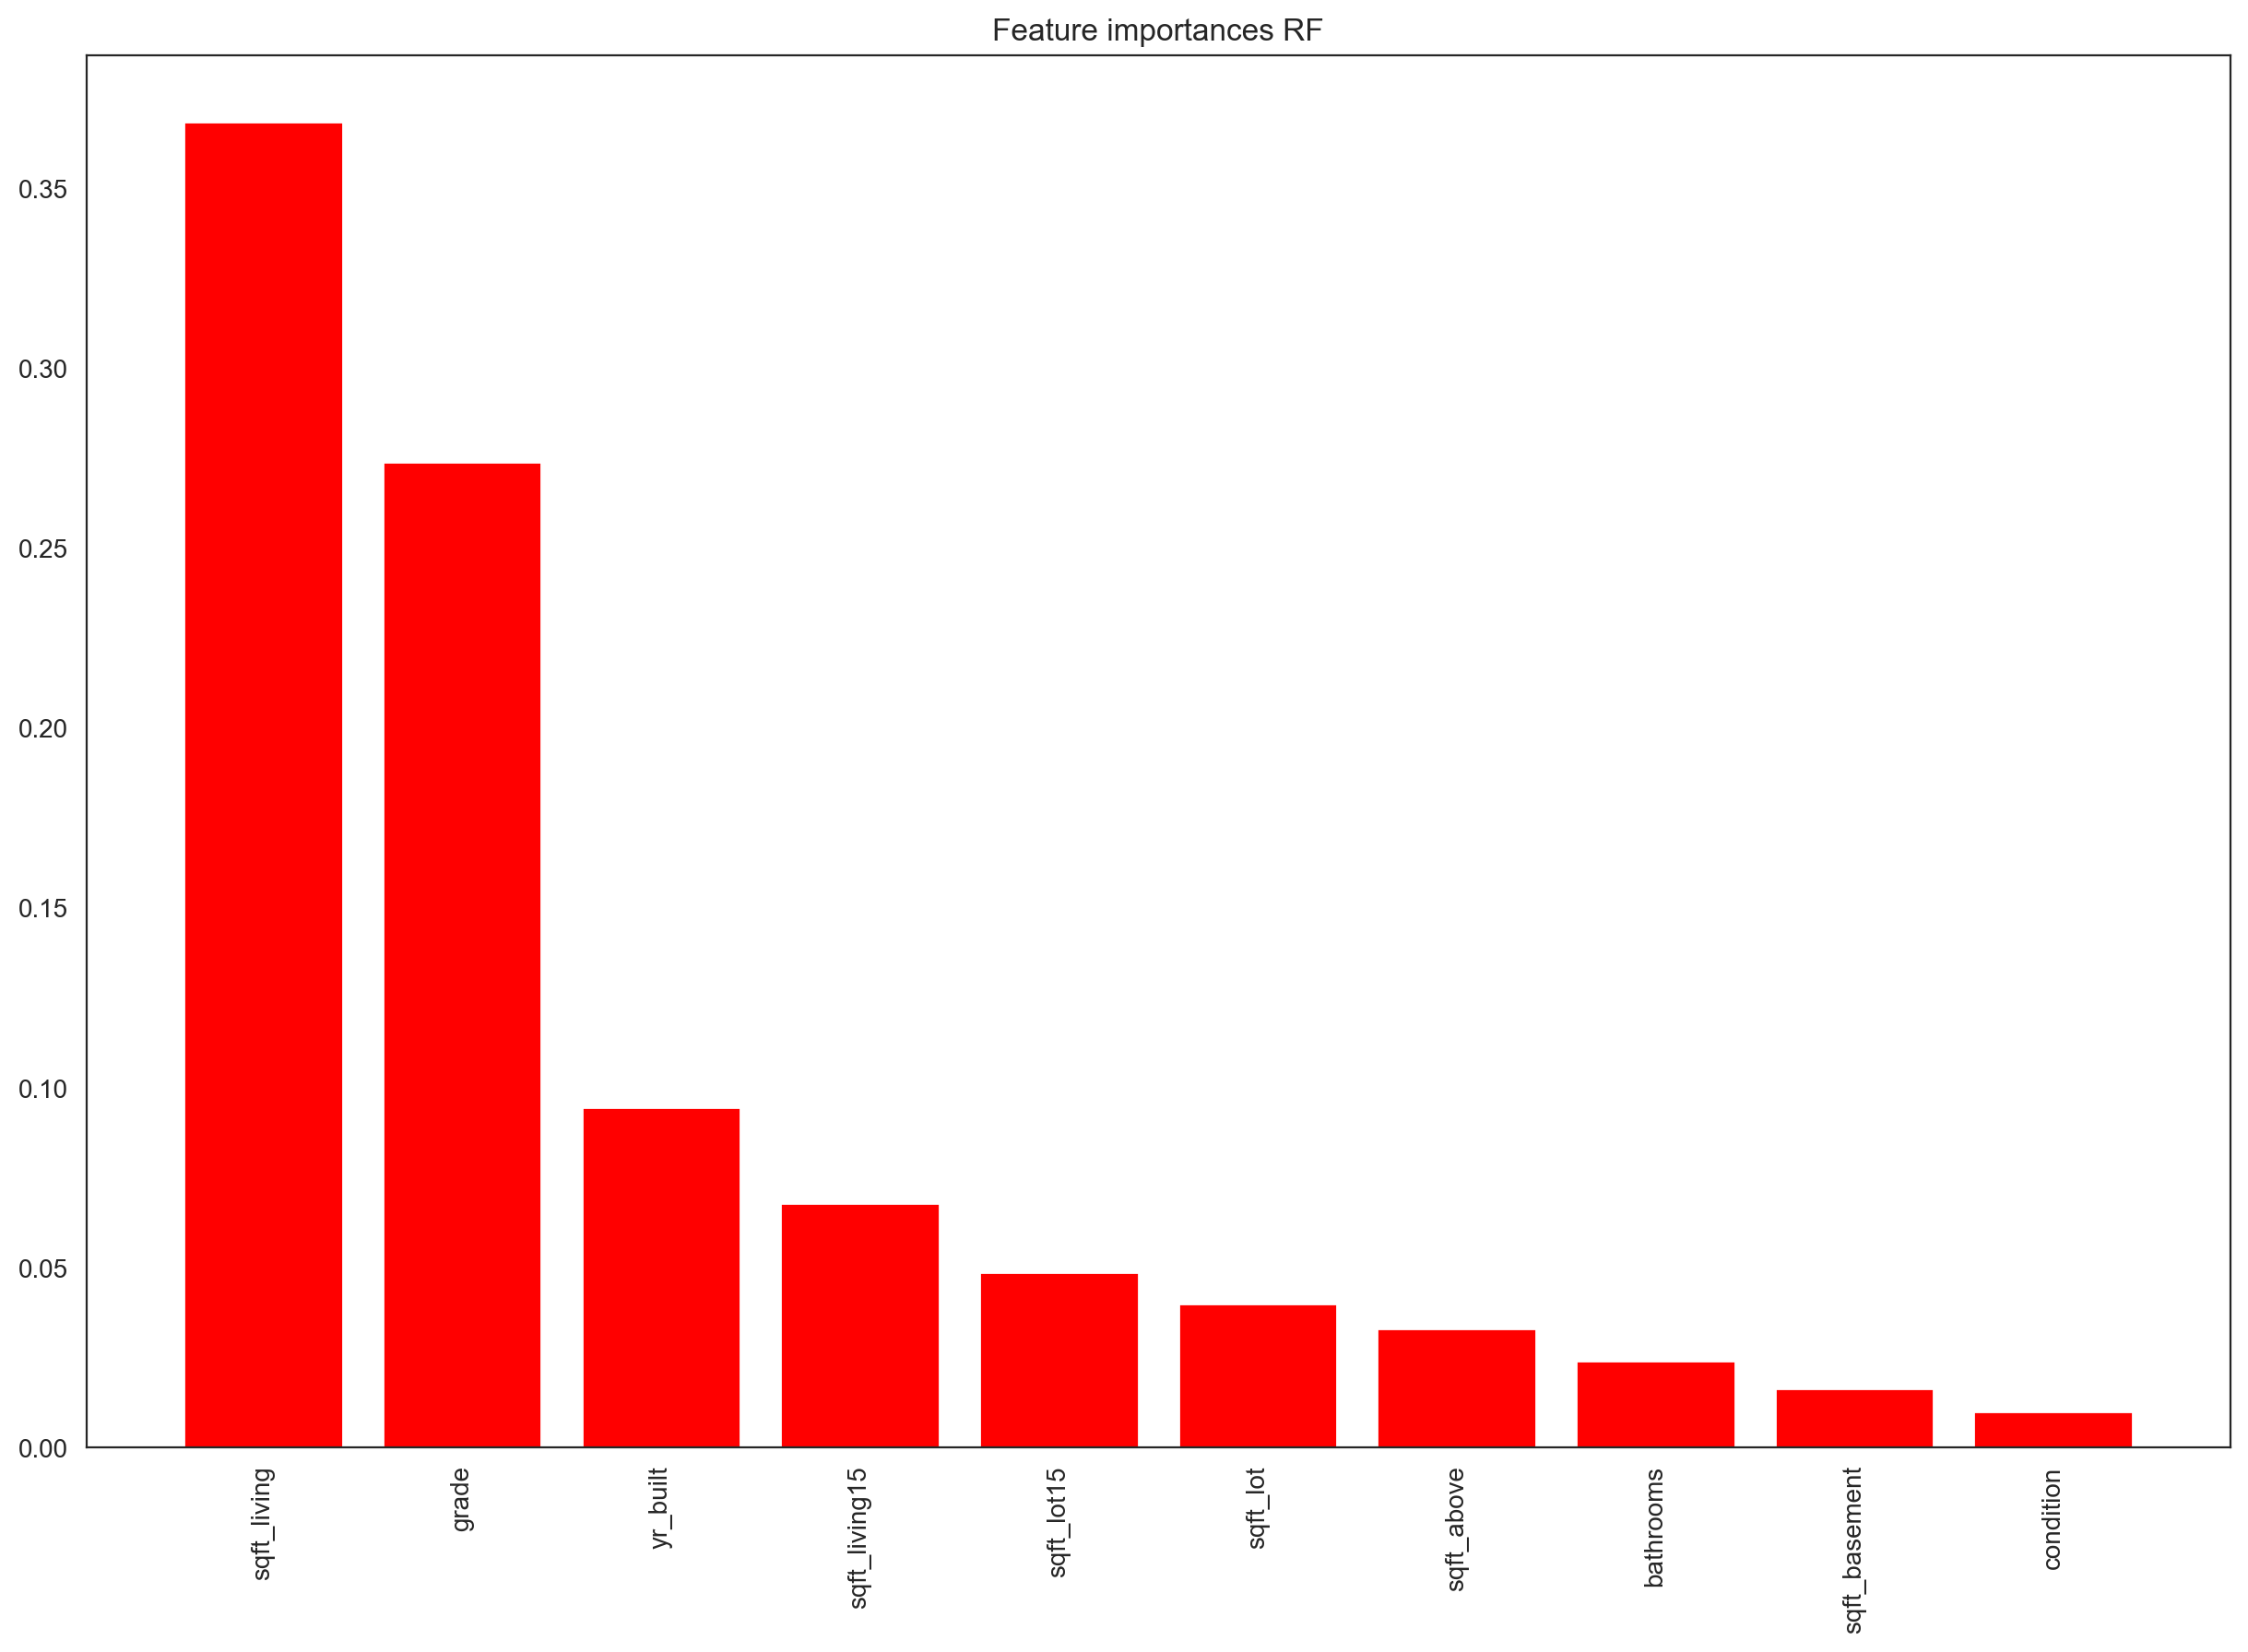

In [54]:
plt.rcParams['figure.figsize'] = [15, 10]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances RF")
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);
plt.show()

In [55]:
y_pred_RF = rfr.predict(Xtest)

In [56]:
df_results_rf = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred_RF})
df_results_rf['Residuals'] = abs(df_results_rf['Actual']) - abs(df_results_rf['Predicted'])
df_results_rf

,Actual,Predicted,Residuals
7583,-0.436339,-0.164396,0.271943
6628,0.844173,0.835160,0.009013
17380,-0.626740,-0.616230,0.010510
14551,-0.264732,-0.452906,-0.188174
17663,0.054102,-0.021470,0.032632
...,...,...,...
11140,-0.782004,-0.521115,0.260888
2581,0.421967,-0.086580,0.335387
8003,0.871413,0.354917,0.516496
16675,-0.205623,-0.086062,0.119561


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'RANDOM FOREST CURVE')

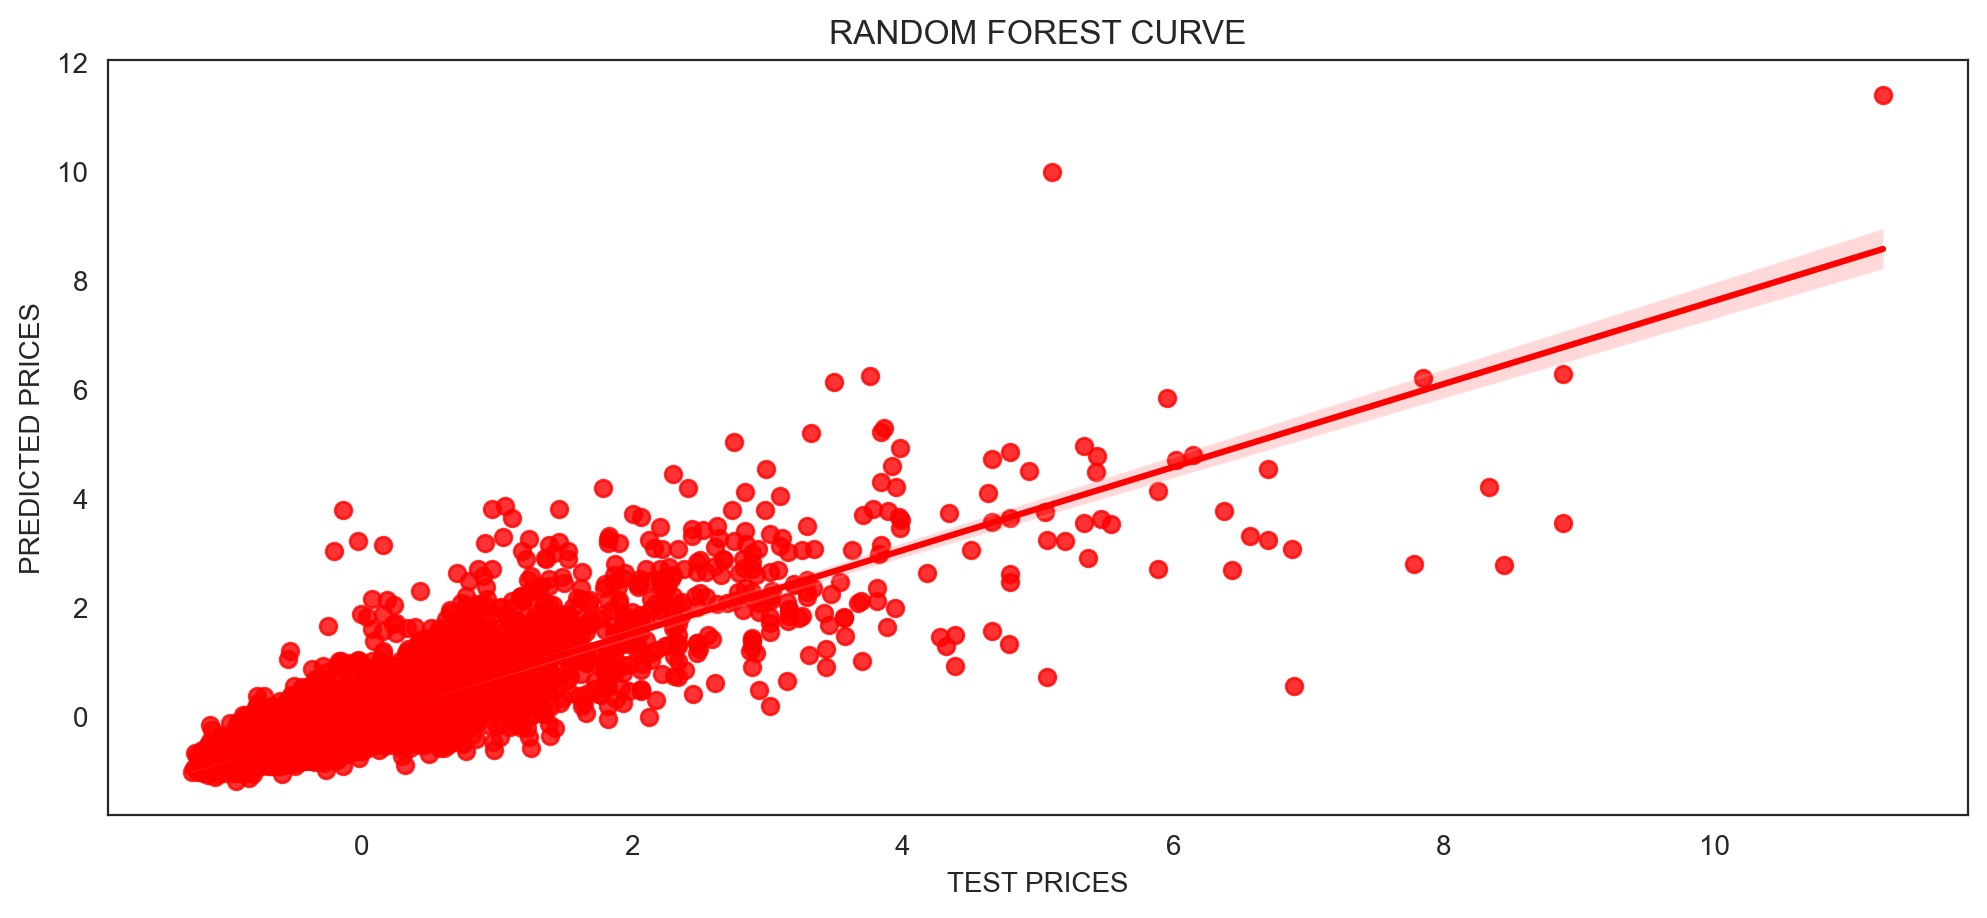

In [57]:
plt.figure(figsize=(12,5))
sns.regplot(ytest,y_pred_RF,df_train,color='red')
plt.xlabel("TEST PRICES")
plt.ylabel("PREDICTED PRICES")
plt.title("RANDOM FOREST CURVE")
#plt.savefig("lr3")

# Logistic Regression

*** BASIC FEATURE ENGINEERING TO CREATE A LABELLED COLUMN CALLED CLUSTERS FOR FURTHER SUPERVISED LEARNING ***

In [58]:
house_data['price'].mean()

540088.1417665294

In [59]:
def cluster_vals (cost):
    if cost > 540088.1417665294:
        return 1
    else:
        return 0
house_data['Cluster']=house_data['price'].apply(cluster_vals)

In [60]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Cluster
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


*** HISTOGRAM OF AREA IN SQUARE FEET OF LIVING AREA BASED ON MEAN PRICE ***

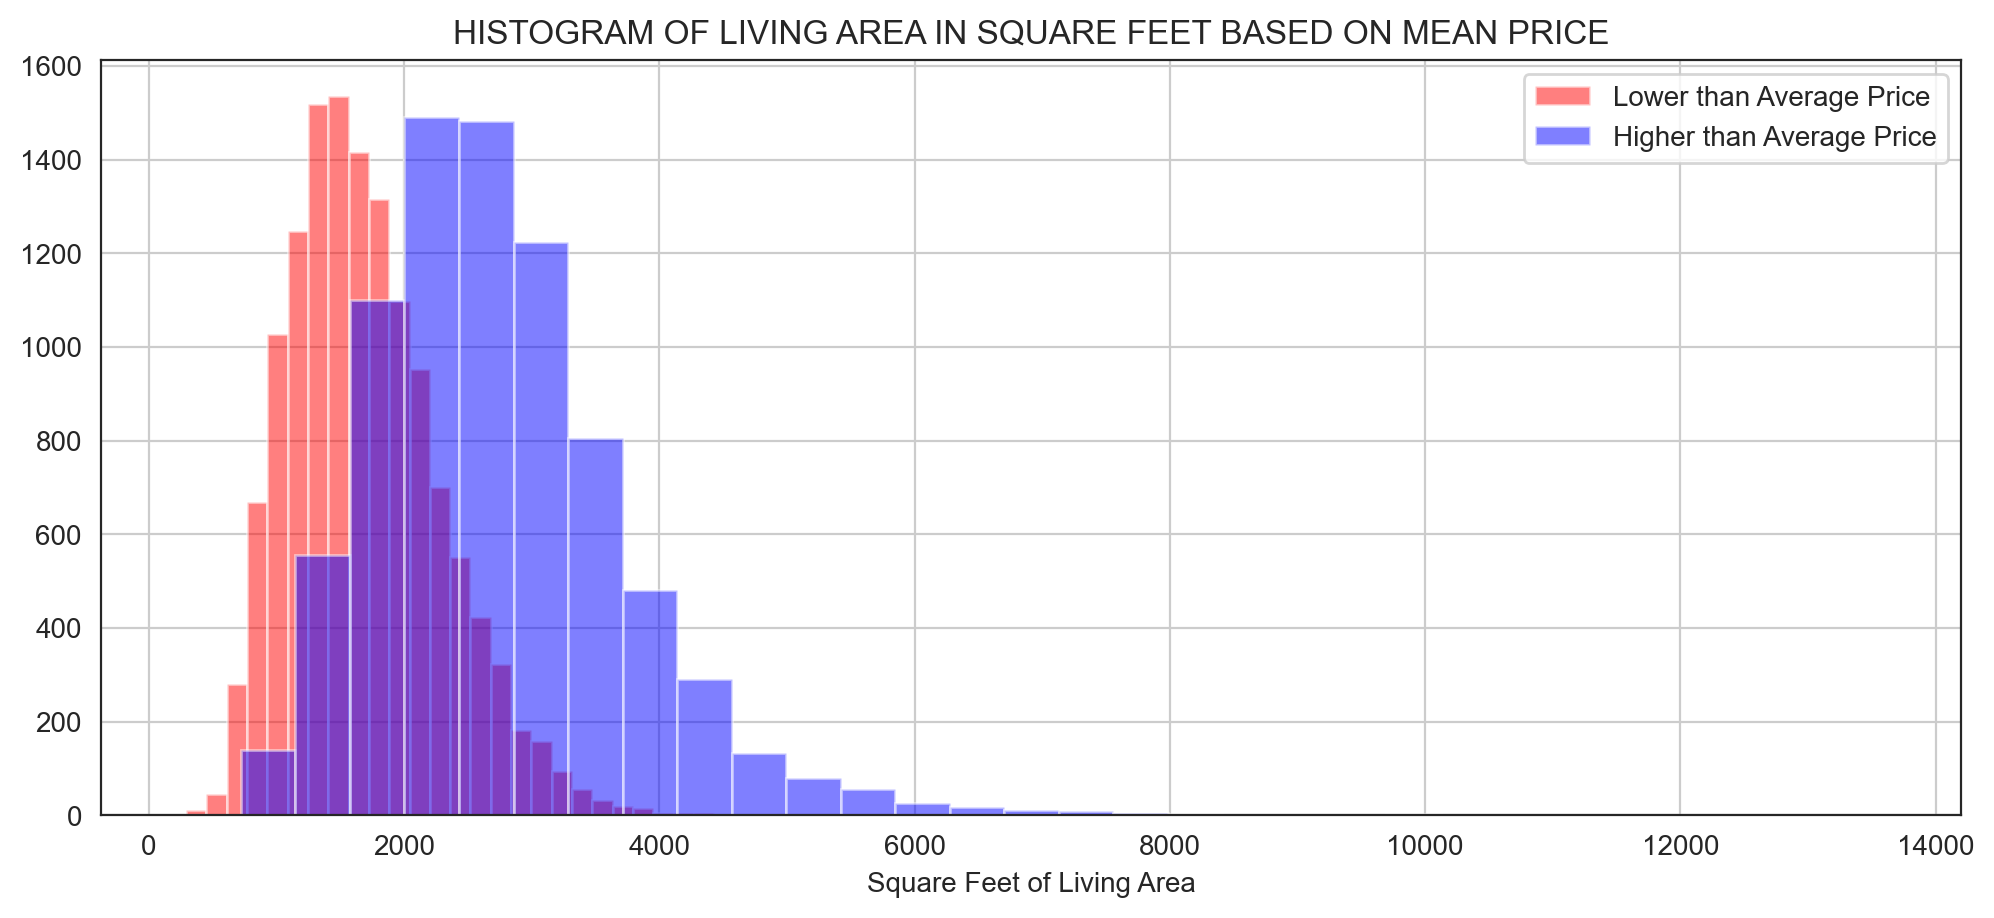

In [61]:
plt.figure(figsize=(12,5))
house_data[house_data['Cluster']==0]['sqft_living'].hist(alpha=0.5,bins=30,label='Lower than Average Price',color='red')
house_data[house_data['Cluster']==1]['sqft_living'].hist(alpha=0.5,bins=30,label='Higher than Average Price',color='blue')
plt.legend()
plt.xlabel('Square Feet of Living Area')
plt.title("HISTOGRAM OF LIVING AREA IN SQUARE FEET BASED ON MEAN PRICE")
plt.savefig('hist2')

*** 3) LOGISTIC REGRESSION - CLASSIFICATION ***

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr = LogisticRegression()

In [64]:
y = house_data['Cluster']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


In [66]:
lr.fit(X_train,y_train)

LogisticRegression()

In [67]:
predictions = lr.predict(X_test)

In [68]:
predictions

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [69]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_results

,Actual,Predicted
6601,0,0
5339,0,0
3210,1,1
20769,1,1
1405,0,0
...,...,...
20850,0,0
7667,0,0
13776,0,0
17829,0,0


*** PERFORMANCE ANALYSIS ***

In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("\nCLASSIFICATION REPORT:\n\n",classification_report(y_test,predictions))
print("\nCONFUSION MATRIX: \n\n",confusion_matrix(y_test,predictions))


CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.84      0.90      0.87      4070
           1       0.81      0.72      0.76      2414

    accuracy                           0.83      6484
   macro avg       0.83      0.81      0.82      6484
weighted avg       0.83      0.83      0.83      6484


CONFUSION MATRIX: 

 [[3665  405]
 [ 677 1737]]


*** 4) DECISION TREE CLASSIFICATION ***

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dtree = DecisionTreeClassifier()

In [73]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
preds = dtree.predict(X_test)

In [75]:
preds

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [76]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': preds})
df_results

,Actual,Predicted
6601,0,0
5339,0,0
3210,1,1
20769,1,1
1405,0,0
...,...,...
20850,0,1
7667,0,1
13776,0,0
17829,0,1


*** PERFORMANCE ANALYSIS ***

In [77]:
print("\nCLASSIFICATION REPORT:\n\n",classification_report(y_test,preds))
print("\nCONFUSION MATRIX: \n\n",confusion_matrix(y_test,preds))


CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.84      0.83      0.83      4070
           1       0.72      0.73      0.72      2414

    accuracy                           0.79      6484
   macro avg       0.78      0.78      0.78      6484
weighted avg       0.79      0.79      0.79      6484


CONFUSION MATRIX: 

 [[3378  692]
 [ 652 1762]]
